# Generation of the plots and figures showing the test metrics of the evaluated methods

In [177]:
import numpy as np

import pandas as pd
import geopandas as gpd
import os

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

data_path = os.path.join('/','home','fterroso','data','Spain-INE-mobility-study-2020')

*Target time horizont*

In [178]:
T=12

In [179]:
def add_total_values_fn(trips_df_):
    trips_df_['total'] = trips_df_.sum(axis=1) # column with total number of trips per area
    trips_df_.loc['total'] = trips_df_.sum(axis=0) # row with total number of trips per day
    return trips_df_

## Read zones geography

In [180]:
zones_gdf = gpd.read_file(os.path.join(data_path,'zonificacion','distritos_mitma.shp'))
zones_gdf = zones_gdf.set_index('ID')

In [181]:
zones_gdf.head()

geometry
ID                                                         
2408910   POLYGON ((290940.137 4719080.203, 290956.704 4...
22117_AM  POLYGON ((774184.362 4662152.523, 774452.348 4...
2305009   POLYGON ((429744.982 4179976.538, 429716.997 4...
07058_AM  POLYGON ((1000859.396 4415059.160, 1000625.088...
2305006   POLYGON ((429795.125 4180956.539, 429860.816 4...

## Read Madrid zones

In [182]:
mad_neigh = gpd.read_file(os.path.join('/','home','fterroso','data','MAD-neighborhoods'))

In [183]:
mad_neigh.head()

CODBDT GEOCODIGO           DESBDT  \
0  907409    079011      011 Palacio   
1  907410    079012  012 Embajadores   
2  907411    079013       013 Cortes   
3  907412    079014     014 Justicia   
4  907413    079015  015 Universidad   

                                            geometry  
0  POLYGON ((439821.423 4474889.157, 439833.708 4...  
1  POLYGON ((440369.412 4473937.262, 440380.549 4...  
2  POLYGON ((440872.264 4474491.446, 440909.644 4...  
3  POLYGON ((440920.102 4475481.029, 440924.669 4...  
4  POLYGON ((439586.516 4475753.323, 439594.830 4...

In [184]:
mad_zones = gpd.sjoin(zones_gdf, mad_neigh, how='inner')

/home/fterroso/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:3042
Right CRS: None

  """Entry point for launching an IPython kernel.


In [185]:
mad_zones.shape

(361, 5)

In [186]:
mad_zones.head()

geometry  index_right  \
ID                                                                        
2807405  POLYGON ((436303.017 4463555.132, 436195.808 4...          106   
2806503  POLYGON ((436510.630 4459283.550, 436200.341 4...          106   
2806504  POLYGON ((440242.028 4457704.454, 440215.125 4...          106   
2807912  POLYGON ((441984.015 4468463.462, 442098.076 4...          106   
2807917  POLYGON ((443148.458 4466349.436, 443143.395 4...          106   

         CODBDT GEOCODIGO          DESBDT  
ID                                         
2807405  907515    079171  171 San Andrés  
2806503  907515    079171  171 San Andrés  
2806504  907515    079171  171 San Andrés  
2807912  907515    079171  171 San Andrés  
2807917  907515    079171  171 San Andrés

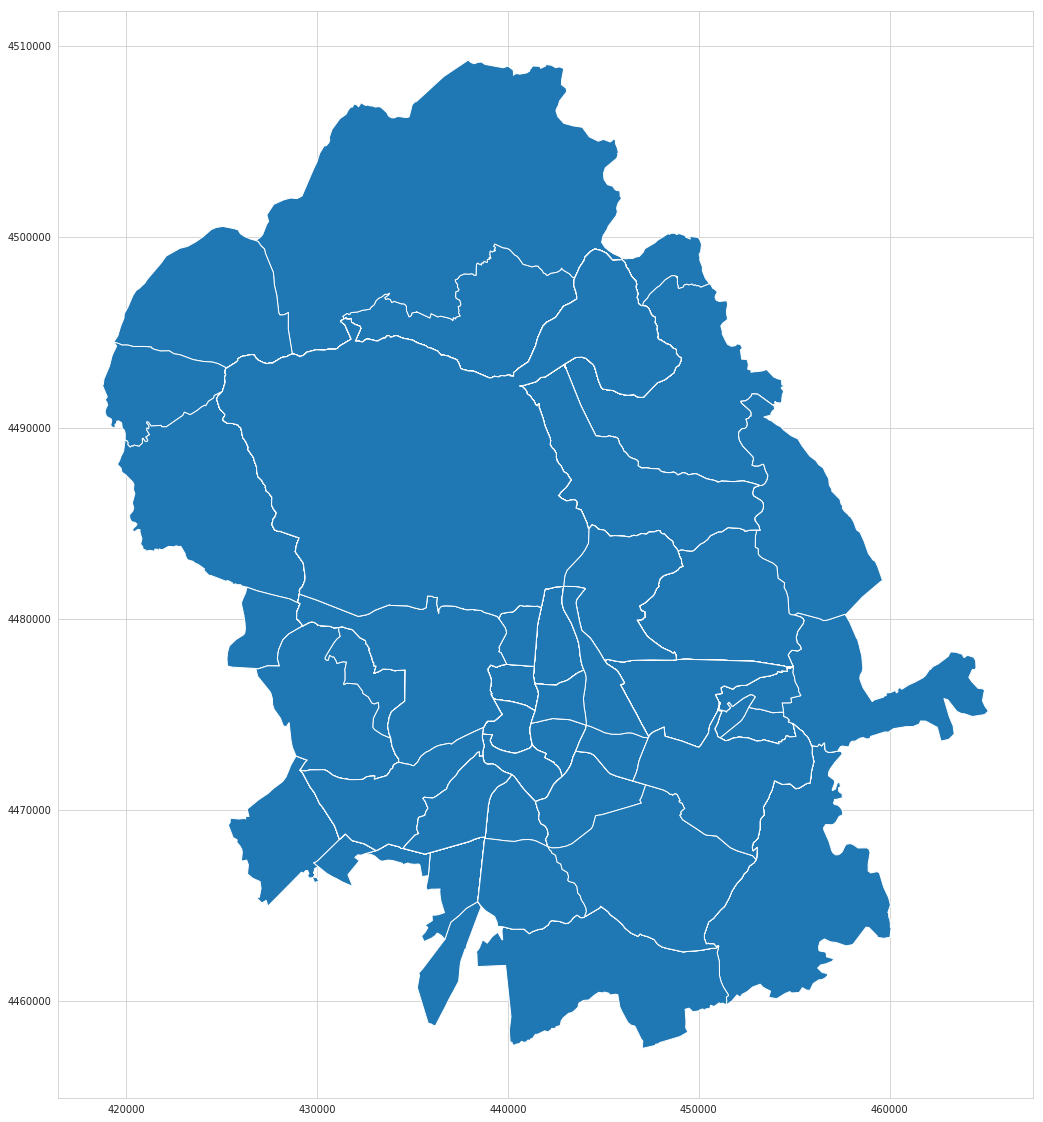

In [187]:
mad_zones.plot(figsize=(20,20));

## Read raw time series

In [188]:
inter_trips = pd.read_csv(os.path.join('data','trips_time_series_all_inter.csv'),index_col=0)
inter_trips= inter_trips.fillna(0)
inter_trips = add_total_values_fn(inter_trips)

In [189]:
inter_trips.tail()

20200221_00  20200221_01  20200221_02  20200221_03  20200221_04  \
05220_AM        0.000        0.000        0.000        0.000        0.000   
40149_AM        0.000        0.000        0.000        0.000        0.000   
31092_AM        0.000        0.000        0.000        0.000        0.000   
20903           0.000        0.000        0.000        0.000        0.000   
total     1684916.941  1226649.105  1042022.789  1060856.350  1416676.085   

          20200221_05  20200221_06  20200221_07  20200221_08  20200221_09  \
05220_AM        0.000        0.000        0.000        0.000        0.000   
40149_AM        0.000        0.000        0.000        0.000        0.000   
31092_AM        0.000        0.000        0.000        0.000        0.000   
20903           0.000        0.000        0.000        0.000        0.000   
total     2260724.424  3464423.098  5400817.701  5740627.237  5047932.524   

          ...  20201130_15  20201130_16  20201130_17  20201130_18  \
05220_AM  ...        0.000        0.000        0.000        0.000   
40149_AM  ...        0.000        0.000        0.000        0.000   
31092_AM  ...      263.079      312.210      233.029       58.550   
20903     ...        0.000        0.000        0.000        0.000   
total     ...  5060517.688  4719101.508  4925188.213  4992998.135   

          20201130_19  20201130_20  20201130_21  20201130_22  20201130_23  \
05220_AM        0.000        0.000        0.000        0.000        0.000   
40149_AM        0.000        0.000        0.000        0.000        0.000   
31092_AM      178.702       64.342        9.760       11.840        0.000   
20903           0.000        0.000        0.000        0.000        0.000   
total     4451594.013  3834109.629  3071823.504  2149818.919  1210790.486   

                   total  
05220_AM      397565.147  
40149_AM       14709.902  
31092_AM      844321.987  
20903         278635.459  
total    20213865332.811  

[5 rows x 6816 columns]

## Model results

In [190]:
def convert_to_stacked_format_fn(df, method_, method_details= None):
    df = df.rename(columns={'{}-MAE'.format(method_): 'MAE', '{}-MSE'.format(method_): 'MSE', '{}-RMSE'.format(method_):'RMSE'})
    df= df.stack().to_frame().reset_index().rename(columns={'level_1':'metric', 0:'value'})
    if method_details != None:
        df['method']= '{}-{}'.format(method_,method_details)
    else:
        df['method']= method_
    return df

### GNN (with distance matrix) and naive results

In [191]:
test_metrics_df = pd.read_csv(os.path.join('data', f'gnn_naive_test_metrics_distance_{T}.csv'), index_col='area_id')
gnn_test_metrics_df= test_metrics_df['gnn-MAE gnn-MSE gnn-RMSE'.split()]
gnn_dist_metrics_stack_df = convert_to_stacked_format_fn(gnn_test_metrics_df, 'gnn', method_details='dist')

In [192]:
test_metrics_df.head()

Unnamed: 0  gnn-MAE   gnn-MSE  gnn-RMSE  naive-MAE  naive-MSE  \
area_id                                                                   
01001_AM           0  128.789 32843.908   181.229    543.867 366401.341   
01002              1   97.363 18371.536   135.542    325.311 153139.983   
01010_AM           2   79.973 12158.593   110.266    313.691 123933.071   
01031_AM           3  134.802 35185.505   187.578    401.986 225736.143   
01036              4  143.788 39626.404   199.064    449.788 326780.057   

          naive-RMSE  
area_id               
01001_AM     605.311  
01002        391.331  
01010_AM     352.041  
01031_AM     475.117  
01036        571.647

In [193]:
naive_test_metrics_df= test_metrics_df['naive-MAE naive-MSE naive-RMSE'.split()]
naive_test_metrics_stack_df = convert_to_stacked_format_fn(naive_test_metrics_df, 'naive')

In [194]:
gnn_dist_metrics_stack_df.head()

area_id metric     value    method
0  01001_AM    MAE   128.789  gnn-dist
1  01001_AM    MSE 32843.908  gnn-dist
2  01001_AM   RMSE   181.229  gnn-dist
3     01002    MAE    97.363  gnn-dist
4     01002    MSE 18371.536  gnn-dist

In [195]:
naive_test_metrics_df.head()

naive-MAE  naive-MSE  naive-RMSE
area_id                                   
01001_AM    543.867 366401.341     605.311
01002       325.311 153139.983     391.331
01010_AM    313.691 123933.071     352.041
01031_AM    401.986 225736.143     475.117
01036       449.788 326780.057     571.647

### GNN with adjacency matrix

In [196]:
gnn_cont_test_metrics_df = pd.read_csv(os.path.join('data', f'gnn_naive_test_metrics_contiguity_{T}.csv'), index_col='area_id')
gnn_cont_test_metrics_df= gnn_cont_test_metrics_df['gnn-MAE gnn-MSE gnn-RMSE'.split()]
gnn_cont_metrics_stack_df = convert_to_stacked_format_fn(gnn_cont_test_metrics_df, 'gnn', method_details='cont')

In [197]:
gnn_cont_test_metrics_df.head()

gnn-MAE   gnn-MSE  gnn-RMSE
area_id                              
01001_AM  110.124 25568.051   159.900
01002      90.931 16644.626   129.014
01010_AM   74.085 10148.445   100.739
01031_AM  124.011 29277.548   171.107
01036     138.916 40525.559   201.310

In [198]:
gnn_cont_metrics_stack_df.head()

area_id metric     value    method
0  01001_AM    MAE   110.124  gnn-cont
1  01001_AM    MSE 25568.051  gnn-cont
2  01001_AM   RMSE   159.900  gnn-cont
3     01002    MAE    90.931  gnn-cont
4     01002    MSE 16644.626  gnn-cont

In [199]:
test_metrics_df[['gnn-cont-MAE', 'gnn-cont-MSE', 'gnn-cont-RMSE']]= gnn_cont_test_metrics_df[['gnn-MAE', 'gnn-MSE', 'gnn-RMSE']]

### GNN with gravity-model

In [200]:
gnn_gm_test_metrics_df = pd.read_csv(os.path.join('data', f'gnn_naive_test_metrics_gravity_model_{T}.csv'), index_col='area_id')
gnn_gm_test_metrics_df= gnn_gm_test_metrics_df['gnn-MAE gnn-MSE gnn-RMSE'.split()]
gnn_gm_metrics_stack_df = convert_to_stacked_format_fn(gnn_gm_test_metrics_df, 'gnn', method_details='gm')

In [201]:
gnn_gm_test_metrics_df.head()

gnn-MAE   gnn-MSE  gnn-RMSE
area_id                              
01001_AM  121.588 32261.573   179.615
01002      96.944 19230.496   138.674
01010_AM   77.778 11837.855   108.802
01031_AM  123.893 31724.115   178.113
01036     154.661 48788.267   220.881

In [202]:
gnn_gm_metrics_stack_df.head()

area_id metric     value  method
0  01001_AM    MAE   121.588  gnn-gm
1  01001_AM    MSE 32261.573  gnn-gm
2  01001_AM   RMSE   179.615  gnn-gm
3     01002    MAE    96.944  gnn-gm
4     01002    MSE 19230.496  gnn-gm

In [203]:
test_metrics_df[['gnn-gm-MAE', 'gnn-gm-MSE', 'gnn-gm-RMSE']]= gnn_gm_test_metrics_df[['gnn-MAE', 'gnn-MSE', 'gnn-RMSE']]

### GNN with queen + GM

In [204]:
gnn_qgm_test_metrics_df = pd.read_csv(os.path.join('data', f'gnn_naive_test_metrics_queen_gravity_model_{T}.csv'), index_col='area_id')
gnn_qgm_test_metrics_df= gnn_qgm_test_metrics_df['gnn-MAE gnn-MSE gnn-RMSE'.split()]
gnn_qgm_metrics_stack_df = convert_to_stacked_format_fn(gnn_qgm_test_metrics_df, 'gnn', method_details='q-gm')

In [205]:
gnn_qgm_test_metrics_df.head()

gnn-MAE   gnn-MSE  gnn-RMSE
area_id                              
01001_AM   93.413 17627.713   132.769
01002      80.893 12277.407   110.803
01010_AM   67.707  8517.479    92.290
01031_AM  109.293 20858.032   144.423
01036     119.170 24693.222   157.141

In [206]:
gnn_qgm_metrics_stack_df.head()

area_id metric     value    method
0  01001_AM    MAE    93.413  gnn-q-gm
1  01001_AM    MSE 17627.713  gnn-q-gm
2  01001_AM   RMSE   132.769  gnn-q-gm
3     01002    MAE    80.893  gnn-q-gm
4     01002    MSE 12277.407  gnn-q-gm

In [207]:
test_metrics_df[['gnn-q-gm-MAE', 'gnn-q-gm-MSE', 'gnn-q-gm-RMSE']]= gnn_qgm_test_metrics_df[['gnn-MAE', 'gnn-MSE', 'gnn-RMSE']]

### GNN with ylag

In [208]:
gnn_ylag_test_metrics_df = pd.read_csv(os.path.join('data', f'gnn_naive_test_metrics_ylag_{T}.csv'), index_col='area_id')
gnn_ylag_test_metrics_df= gnn_ylag_test_metrics_df['gnn-MAE gnn-MSE gnn-RMSE'.split()]
gnn_ylag_metrics_stack_df = convert_to_stacked_format_fn(gnn_ylag_test_metrics_df, 'gnn', method_details='ylag')

In [209]:
gnn_ylag_test_metrics_df.head()

gnn-MAE   gnn-MSE  gnn-RMSE
area_id                              
01001_AM  106.846 23247.774   152.472
01002      89.399 16349.621   127.866
01010_AM   73.473 10343.727   101.704
01031_AM  115.807 25310.436   159.093
01036     136.575 38534.420   196.302

In [210]:
gnn_ylag_metrics_stack_df.head()

area_id metric     value    method
0  01001_AM    MAE   106.846  gnn-ylag
1  01001_AM    MSE 23247.774  gnn-ylag
2  01001_AM   RMSE   152.472  gnn-ylag
3     01002    MAE    89.399  gnn-ylag
4     01002    MSE 16349.621  gnn-ylag

In [211]:
test_metrics_df[['gnn-ylag-MAE', 'gnn-ylag-MSE', 'gnn-ylag-RMSE']]= gnn_ylag_test_metrics_df[['gnn-MAE', 'gnn-MSE', 'gnn-RMSE']]

### LSTM results

In [212]:
lstm_test_metrics_0_500_df = pd.read_csv(os.path.join('data', f'lstm_test_metrics_0_500_{T}.csv'), index_col='area_id')
lstm_test_metrics_500_1000_df = pd.read_csv(os.path.join('data', f'lstm_test_metrics_500_1000_{T}.csv'), index_col='area_id')
lstm_test_metrics_1000_1500_df = pd.read_csv(os.path.join('data', f'lstm_test_metrics_1000_1500_{T}.csv'), index_col='area_id')
lstm_test_metrics_1500_2000_df = pd.read_csv(os.path.join('data', f'lstm_test_metrics_1500_2000_{T}.csv'), index_col='area_id')
#lstm_test_metrics_2000_2842_df = pd.read_csv(os.path.join('data', f'lstm_test_metrics_2000_2842_{T}.csv'), index_col='area_id')

In [213]:
lstm_test_metrics_df = pd.concat([lstm_test_metrics_0_500_df, 
                                 lstm_test_metrics_500_1000_df,
                                 lstm_test_metrics_1000_1500_df,
                                 lstm_test_metrics_1500_2000_df])#,
                                 #lstm_test_metrics_2000_2842_df])

In [214]:
lstm_test_metrics_df

Unnamed: 0  lstm-MAE   lstm-MSE  lstm-RMSE
area_id                                             
01001_AM           0   196.257  73641.841    271.370
01002              1   138.718  32584.839    180.513
01010_AM           2   114.163  20619.871    143.596
01031_AM           3   127.847  27067.958    164.523
01036              4   215.065  74995.325    273.853
...              ...       ...        ...        ...
28010              5   186.660  58892.027    242.677
2801301            6   141.504  33350.088    182.620
2801302            7   178.634  56898.013    238.533
2801303            8   165.555  52365.296    228.835
2801304            9   258.162 109554.648    330.990

[1510 rows x 4 columns]

In [215]:
test_metrics_df[['lstm-MAE', 'lstm-MSE', 'lstm-RMSE']]= lstm_test_metrics_df[['lstm-MAE', 'lstm-MSE', 'lstm-RMSE']]

In [216]:
lstm_test_metrics_stack_df = convert_to_stacked_format_fn(lstm_test_metrics_df, 'lstm')

In [217]:
lstm_test_metrics_stack_df.head()

area_id      metric     value method
0  01001_AM  Unnamed: 0     0.000   lstm
1  01001_AM         MAE   196.257   lstm
2  01001_AM         MSE 73641.841   lstm
3  01001_AM        RMSE   271.370   lstm
4     01002  Unnamed: 0     1.000   lstm

### ARIMA results

In [218]:
#arima_test_metrics_0_500_df = pd.read_csv(os.path.join('data', f'arima_test_metrics_0_500_2_{T}.csv'), index_col='area_id')
#arima_test_metrics_500_1000_df = pd.read_csv(os.path.join('data', 'arima_test_metrics_500_1000_2.csv'), index_col='area_id')
arima_test_metrics_1000_1500_df = pd.read_csv(os.path.join('data', f'arima_test_metrics_1000_1500_2_{T}.csv'), index_col='area_id')
#arima_test_metrics_1500_2000_df = pd.read_csv(os.path.join('data', 'arima_test_metrics_1500_2000_2.csv'), index_col='area_id')
#arima_test_metrics_2000_2842_df = pd.read_csv(os.path.join('data', 'arima_test_metrics_2000_2842_2.csv'), index_col='area_id')

In [219]:
arima_test_metrics_df =arima_test_metrics_1000_1500_df

"""
arima_test_metrics_df = pd.concat([arima_test_metrics_0_500_df, 
                                  arima_test_metrics_500_1000_df,
                                 arima_test_metrics_1000_1500_df,
                                 arima_test_metrics_1500_2000_df,
                                 arima_test_metrics_2000_2842_df])

"""


'\narima_test_metrics_df = pd.concat([arima_test_metrics_0_500_df, \n                                  arima_test_metrics_500_1000_df,\n                                 arima_test_metrics_1000_1500_df,\n                                 arima_test_metrics_1500_2000_df,\n                                 arima_test_metrics_2000_2842_df])\n\n'

In [220]:
arima_test_metrics_stack_df = convert_to_stacked_format_fn(arima_test_metrics_df, 'arima')

In [221]:
arima_test_metrics_df.head()

Unnamed: 0  arima-MAE  arima-MSE  arima-RMSE
area_id                                               
01001_AM           0    140.984  32466.698     180.185
01002              1    154.954  33178.690     182.150
01010_AM           2    114.164  16659.806     129.073
01031_AM           3    140.326  33645.813     183.428
01036              4    224.865  64196.987     253.371

In [222]:
test_metrics_df[['arima-MAE', 'arima-MSE', 'arima-RMSE']]= arima_test_metrics_df[['arima-MAE', 'arima-MSE', 'arima-RMSE']]

In [223]:
pd.options.display.float_format = '{:.3f}'.format

In [224]:
test_metrics_df.mean()

Unnamed: 0         1421.500
gnn-MAE             206.836
gnn-MSE          239994.215
gnn-RMSE            295.081
naive-MAE           940.104
naive-MSE       3209833.152
naive-RMSE         1068.467
gnn-cont-MAE        187.419
gnn-cont-MSE     189112.463
gnn-cont-RMSE       269.144
gnn-gm-MAE          193.796
gnn-gm-MSE       195603.403
gnn-gm-RMSE         277.460
gnn-q-gm-MAE        159.373
gnn-q-gm-MSE     118149.585
gnn-q-gm-RMSE       218.187
gnn-ylag-MAE        179.012
gnn-ylag-MSE     182799.867
gnn-ylag-RMSE       261.680
lstm-MAE            252.473
lstm-MSE         238852.906
lstm-RMSE           330.673
arima-MAE           216.664
arima-MSE        128209.707
arima-RMSE          263.832
dtype: float64

In [225]:
test_metrics_df.std()

Unnamed: 0           821.136
gnn-MAE              267.642
gnn-MSE          1206237.416
gnn-RMSE             391.120
naive-MAE           1265.396
naive-MSE       14297120.361
naive-RMSE          1438.381
gnn-cont-MAE         229.787
gnn-cont-MSE      913244.057
gnn-cont-RMSE        341.636
gnn-gm-MAE           234.397
gnn-gm-MSE        949279.271
gnn-gm-RMSE          344.472
gnn-q-gm-MAE         187.872
gnn-q-gm-MSE      599204.577
gnn-q-gm-RMSE        265.648
gnn-ylag-MAE         220.276
gnn-ylag-MSE      898308.893
gnn-ylag-RMSE        338.177
lstm-MAE             267.717
lstm-MSE         1135378.617
lstm-RMSE            359.992
arima-MAE            205.569
arima-MSE         230840.883
arima-RMSE           244.696
dtype: float64

## Concat all results

In [226]:
all_results= pd.concat([gnn_dist_metrics_stack_df,
                        gnn_cont_metrics_stack_df,
                        gnn_gm_metrics_stack_df,
                        gnn_qgm_metrics_stack_df,
                        gnn_ylag_metrics_stack_df,
                        naive_test_metrics_stack_df,
                        lstm_test_metrics_stack_df,
                        arima_test_metrics_stack_df], axis=0)

In [227]:
all_results.head()

area_id metric     value    method
0  01001_AM    MAE   128.789  gnn-dist
1  01001_AM    MSE 32843.908  gnn-dist
2  01001_AM   RMSE   181.229  gnn-dist
3     01002    MAE    97.363  gnn-dist
4     01002    MSE 18371.536  gnn-dist

## Box plot with all metrics

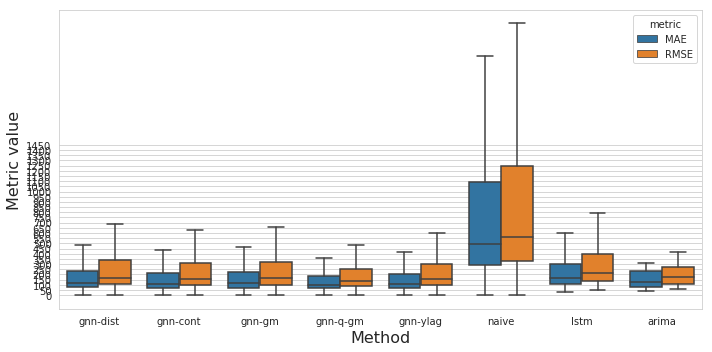

In [228]:
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
ax= sns.boxplot(data=all_results[all_results['metric'].isin(['MAE', 'RMSE'])], x='method', y='value', hue='metric', showfliers = False);
ax.set_yticks(np.arange(0,1500,50))
ax.set_ylabel('Metric value')
ax.set_xlabel('Method')
ax.xaxis.label.set_size(16)
ax.yaxis.label.set_size(16)
plt.tight_layout()
plt.savefig(os.path.join('figs', f'test_values_MAE_RMSE_{T}.png'))

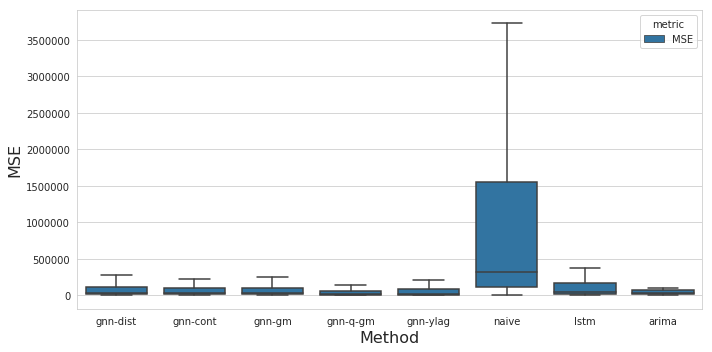

In [229]:
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
ax= sns.boxplot(data=all_results[all_results['metric'].isin(['MSE'])], x='method', y='value', hue='metric', showfliers = False);
ax.set_ylabel('MSE')
ax.set_xlabel('Method')
ax.xaxis.label.set_size(16)
ax.yaxis.label.set_size(16)
plt.tight_layout()
plt.savefig(os.path.join('figs', f'test_values_MSE_{T}.png'))

## Maps with metrics

In [230]:
test_metrics_df['total_trips'] = inter_trips['total']
test_metrics_df['geometry'] = zones_gdf['geometry']
test_metrics_df = test_metrics_df.fillna(0)

In [231]:
test_metrics_df.head()

Unnamed: 0  gnn-MAE   gnn-MSE  gnn-RMSE  naive-MAE  naive-MSE  \
area_id                                                                   
01001_AM           0  128.789 32843.908   181.229    543.867 366401.341   
01002              1   97.363 18371.536   135.542    325.311 153139.983   
01010_AM           2   79.973 12158.593   110.266    313.691 123933.071   
01031_AM           3  134.802 35185.505   187.578    401.986 225736.143   
01036              4  143.788 39626.404   199.064    449.788 326780.057   

          naive-RMSE  gnn-cont-MAE  gnn-cont-MSE  gnn-cont-RMSE  ...  \
area_id                                                          ...   
01001_AM     605.311       110.124     25568.051        159.900  ...   
01002        391.331        90.931     16644.626        129.014  ...   
01010_AM     352.041        74.085     10148.445        100.739  ...   
01031_AM     475.117       124.011     29277.548        171.107  ...   
01036        571.647       138.916     40525.559        201.310  ...   

          gnn-ylag-MSE  gnn-ylag-RMSE  lstm-MAE  lstm-MSE  lstm-RMSE  \
area_id                                                                
01001_AM     23247.774        152.472   196.257 73641.841    271.370   
01002        16349.621        127.866   138.718 32584.839    180.513   
01010_AM     10343.727        101.704   114.163 20619.871    143.596   
01031_AM     25310.436        159.093   127.847 27067.958    164.523   
01036        38534.420        196.302   215.065 74995.325    273.853   

          arima-MAE  arima-MSE  arima-RMSE  total_trips  \
area_id                                                   
01001_AM    140.984  32466.698     180.185  4189691.344   
01002       154.954  33178.690     182.150  2441188.659   
01010_AM    114.164  16659.806     129.073  1988351.484   
01031_AM    140.326  33645.813     183.428  3330112.565   
01036       224.865  64196.987     253.371  3408282.950   

                                                   geometry  
area_id                                                      
01001_AM  POLYGON ((543638.233 4737457.613, 543361.544 4...  
01002     MULTIPOLYGON (((502019.579 4753948.366, 501874...  
01010_AM  POLYGON ((499938.436 4768365.760, 499305.175 4...  
01031_AM  MULTIPOLYGON (((542515.689 4705413.036, 542580...  
01036     POLYGON ((505001.864 4776212.132, 505252.582 4...  

[5 rows x 27 columns]

In [232]:
results_gdf = gpd.GeoDataFrame(test_metrics_df, geometry=test_metrics_df['geometry'])

In [233]:
results_gdf.shape

(2844, 27)

In [234]:
def generate_map_plot_fn(gdf, column_name, scheme='quantiles'):
    f, ax = plt.subplots(1, figsize=(20, 20))
    
    if scheme =='quantiles':
        gdf.plot(column=column_name, scheme='quantiles', \
            k=5, cmap='GnBu', linewidth=0.1, ax=ax, \
            edgecolor='black', legend=True)
    else:
        gdf.plot(column=column_name,
                 scheme='user_defined', 
                 classification_kwds={'bins':[100, 500, 1000, 2000, 3000]}, 
                 cmap='GnBu', linewidth=0.1, ax=ax, 
                 edgecolor='black', legend=True)
        #
    ax.axis('off')
    plt.tight_layout()
    plt.savefig(os.path.join('figs', 'map_{}_{}_{}.png'.format(column_name, scheme, T)))
    plt.show()  

### Spain results

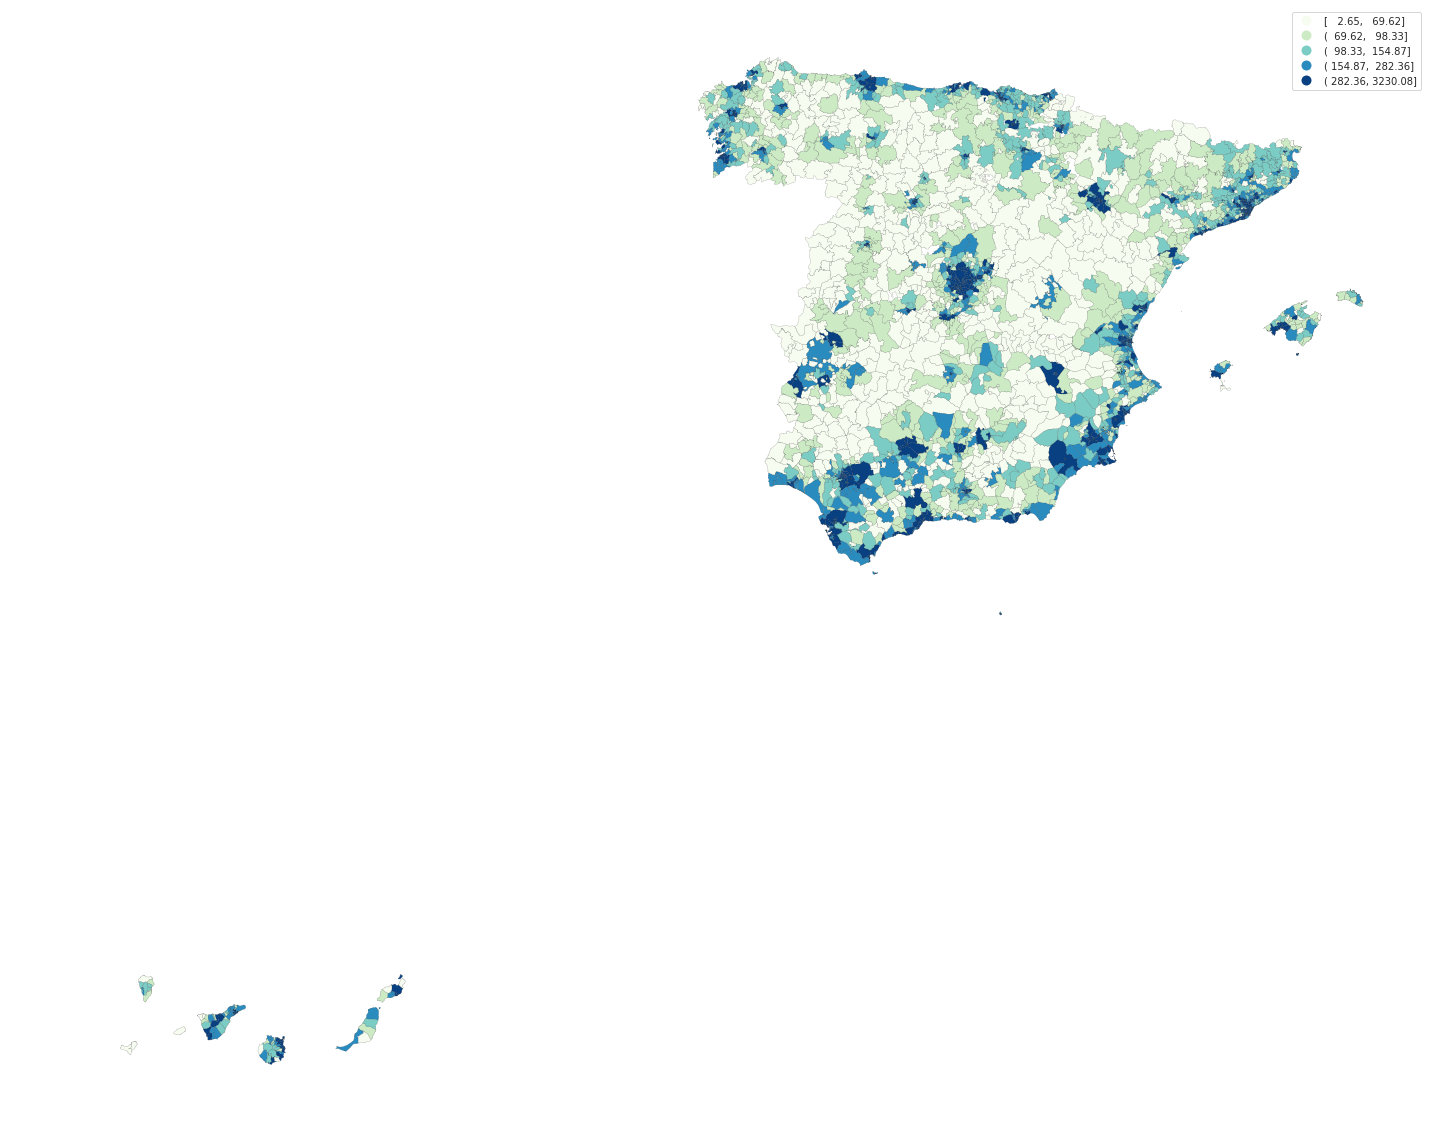

In [235]:
generate_map_plot_fn(results_gdf, 'gnn-MAE')


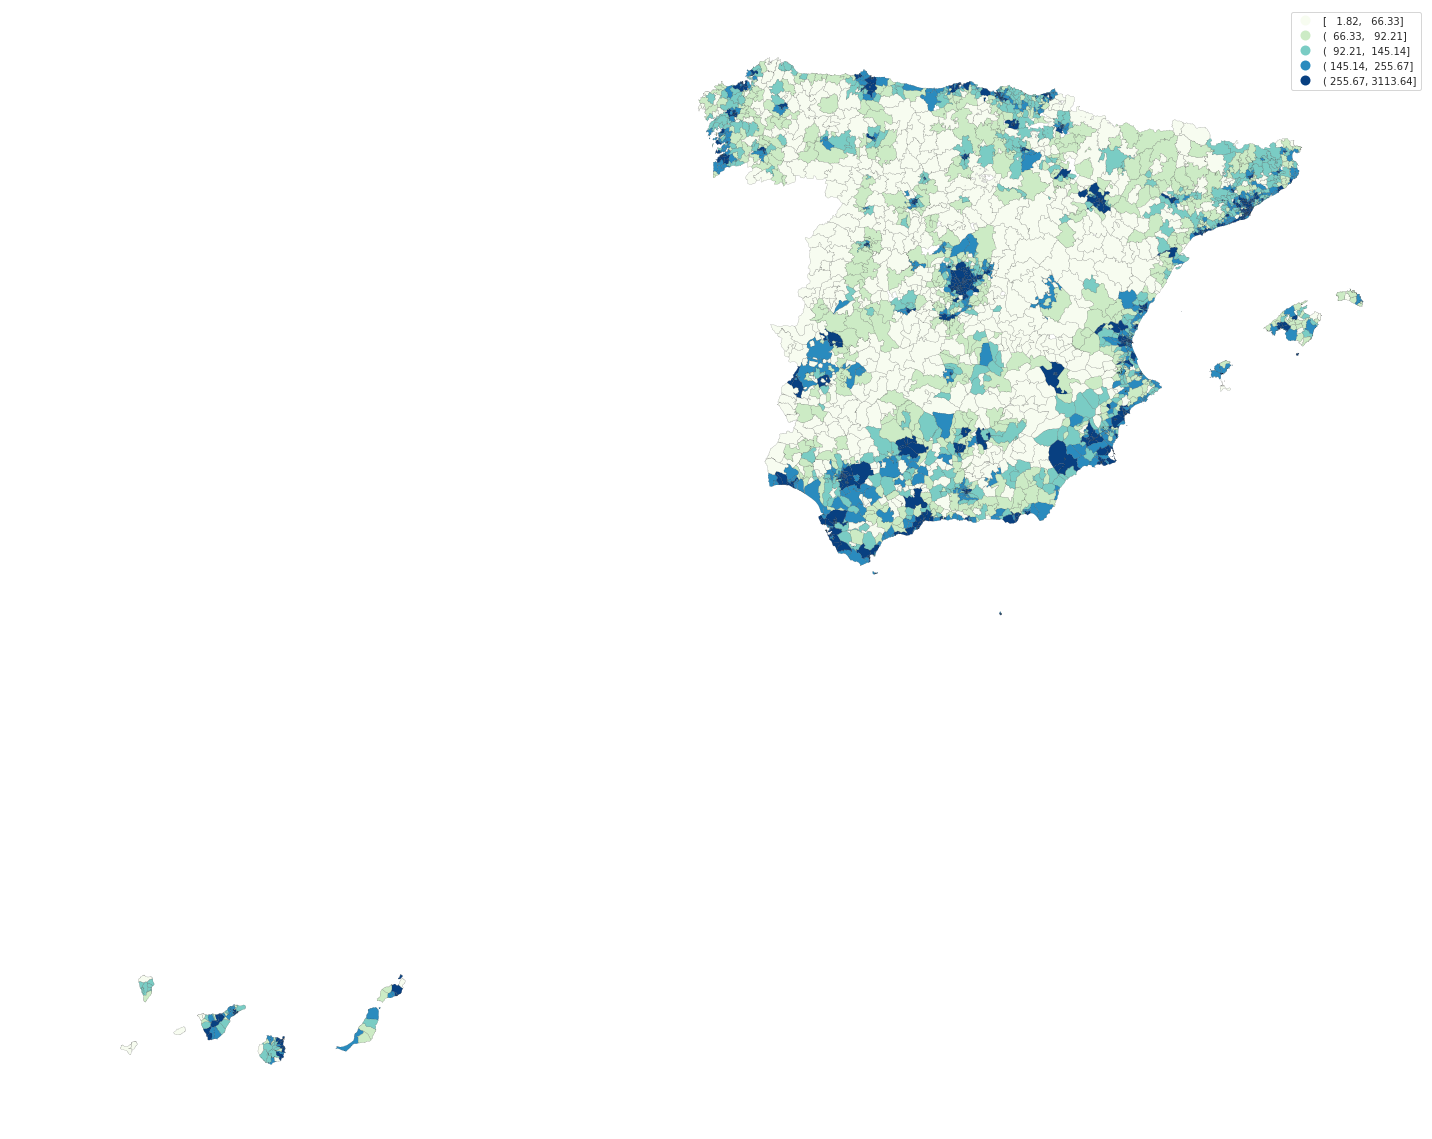

In [236]:
generate_map_plot_fn(results_gdf, 'gnn-cont-MAE')

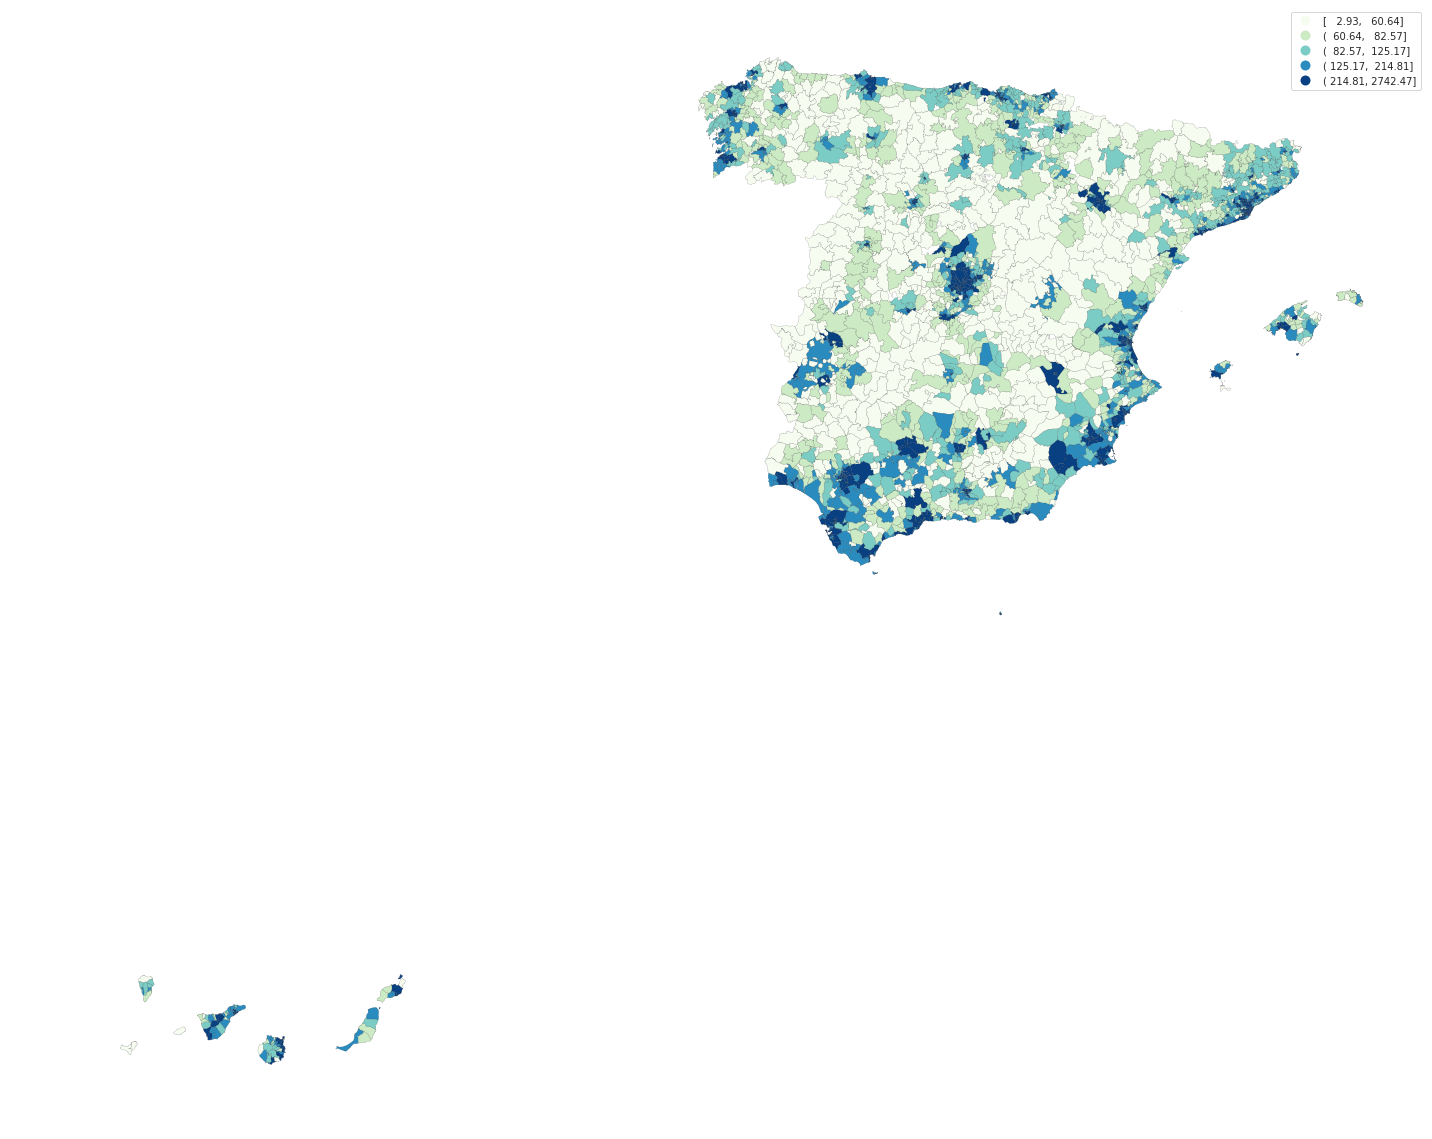

In [237]:
generate_map_plot_fn(results_gdf, 'gnn-q-gm-MAE')

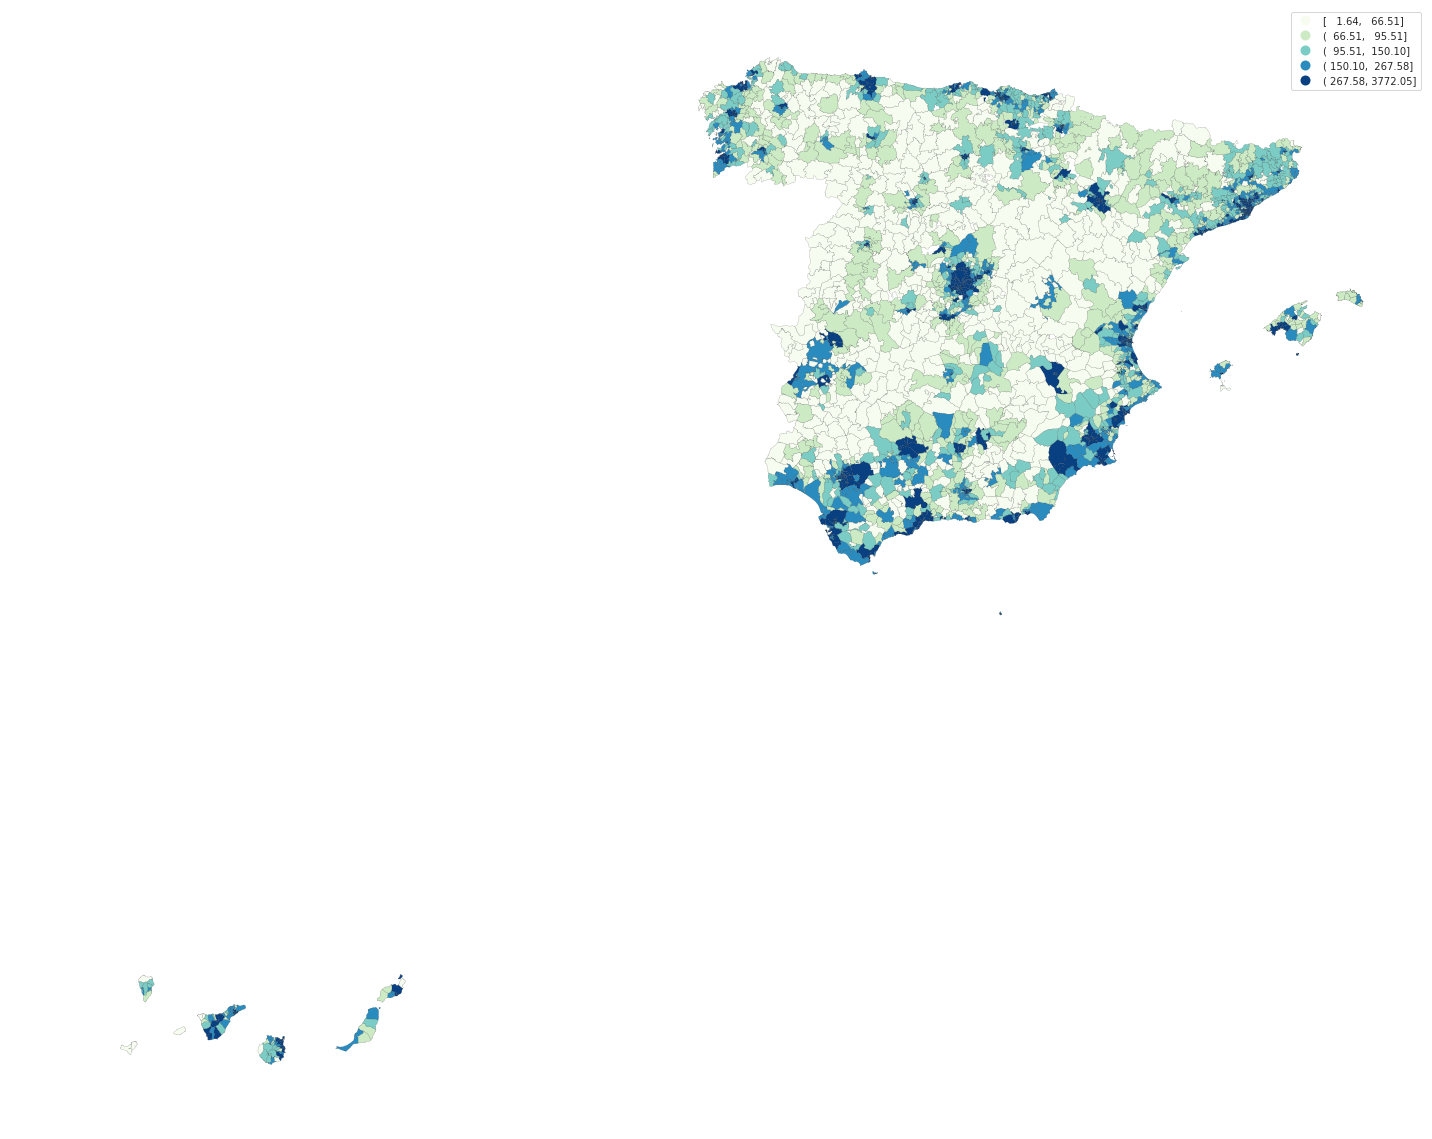

In [238]:
generate_map_plot_fn(results_gdf, 'gnn-gm-MAE')

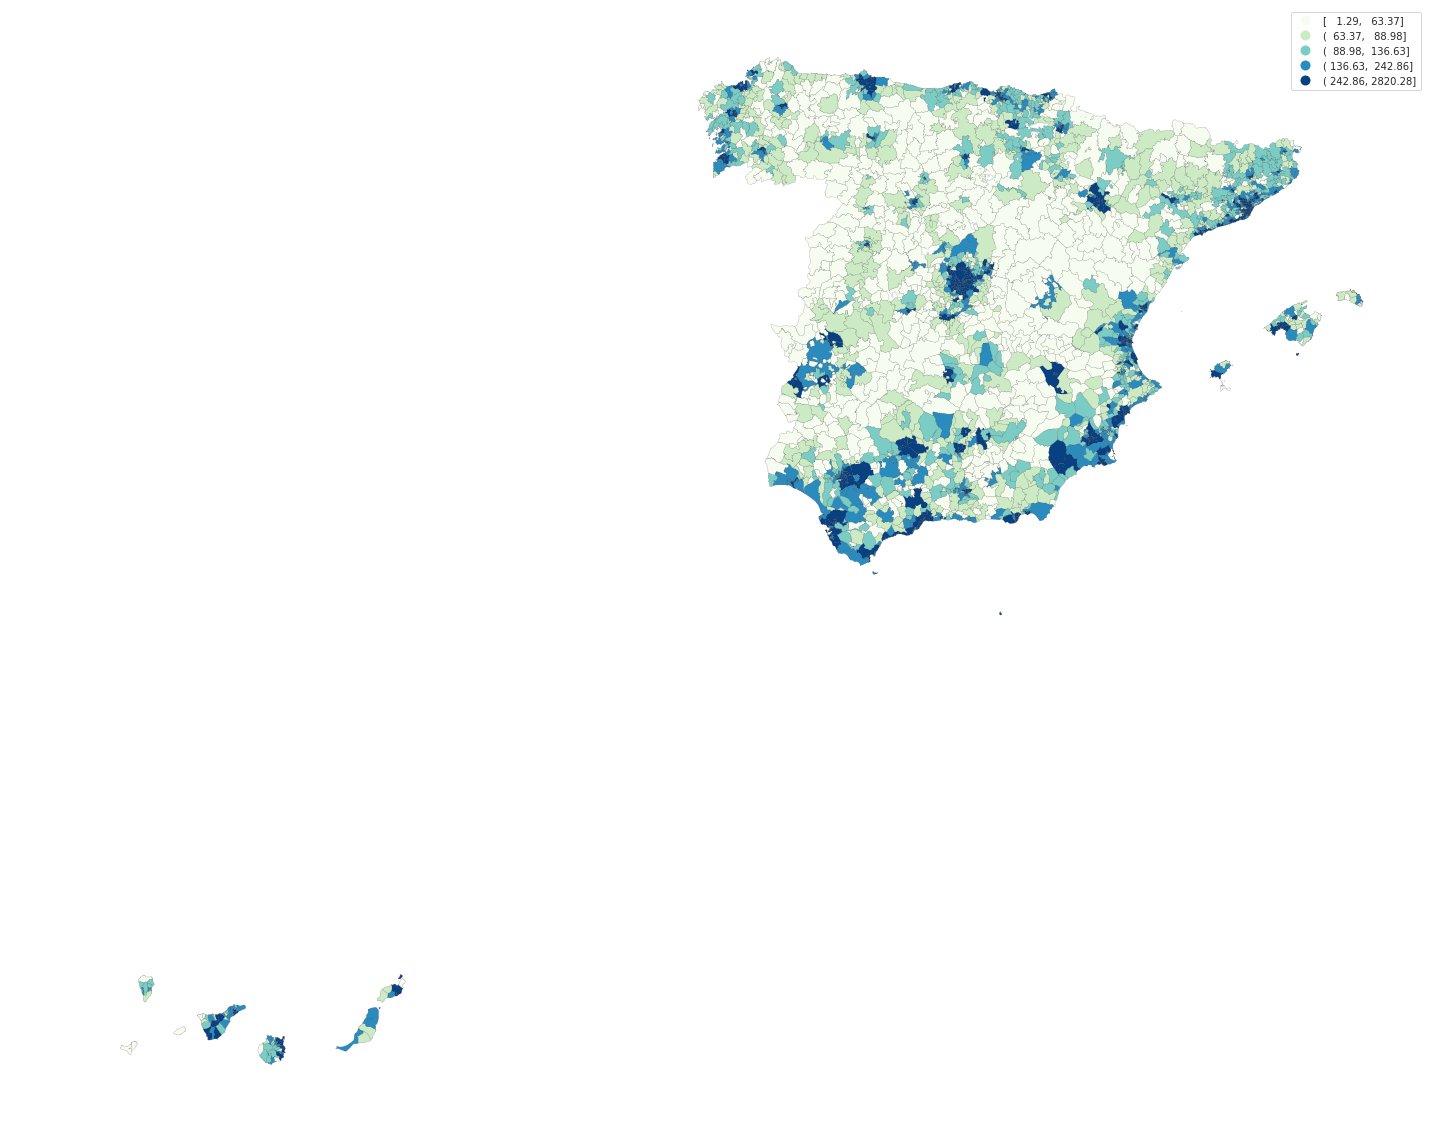

In [239]:
generate_map_plot_fn(results_gdf, 'gnn-ylag-MAE')

/home/fterroso/python/lib/python3.6/site-packages/mapclassify/classifiers.py:237: UserWarning: Warning: Not enough unique values in array to form k classes
  "Warning: Not enough unique values in array to form k classes", UserWarning
/home/fterroso/python/lib/python3.6/site-packages/mapclassify/classifiers.py:239: UserWarning: Warning: setting k to 4
  Warn("Warning: setting k to %d" % k_q, UserWarning)


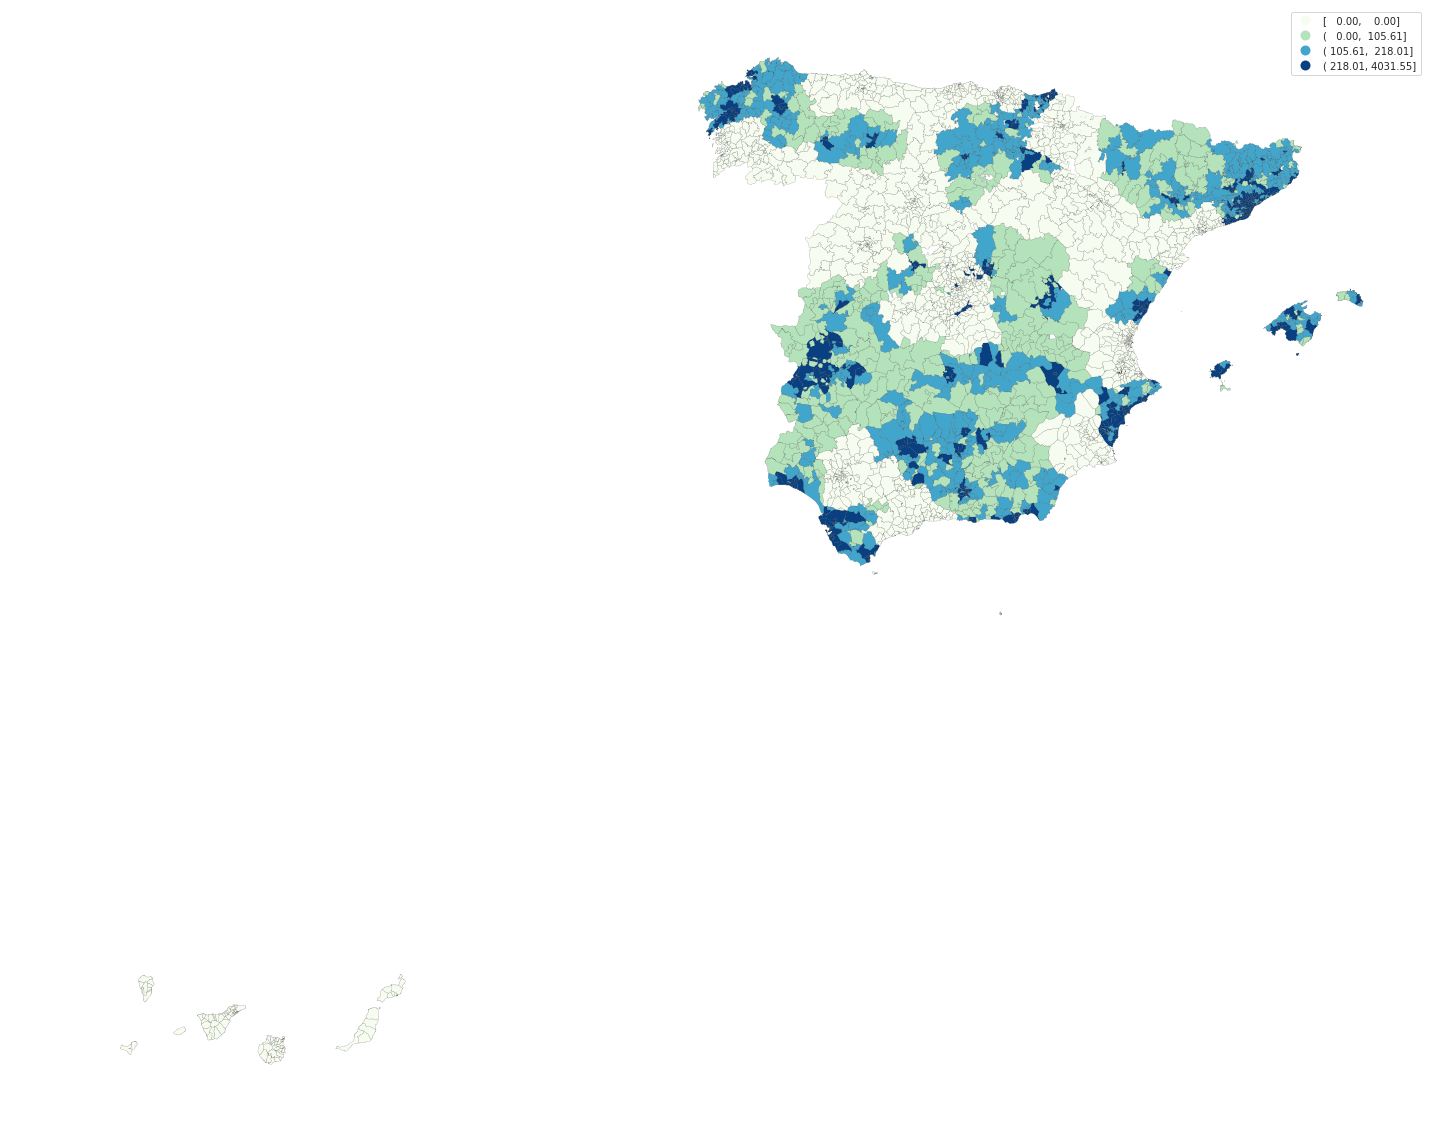

In [240]:
generate_map_plot_fn(results_gdf, 'lstm-MAE')

/home/fterroso/python/lib/python3.6/site-packages/mapclassify/classifiers.py:237: UserWarning: Warning: Not enough unique values in array to form k classes
  "Warning: Not enough unique values in array to form k classes", UserWarning
/home/fterroso/python/lib/python3.6/site-packages/mapclassify/classifiers.py:239: UserWarning: Warning: setting k to 2
  Warn("Warning: setting k to %d" % k_q, UserWarning)


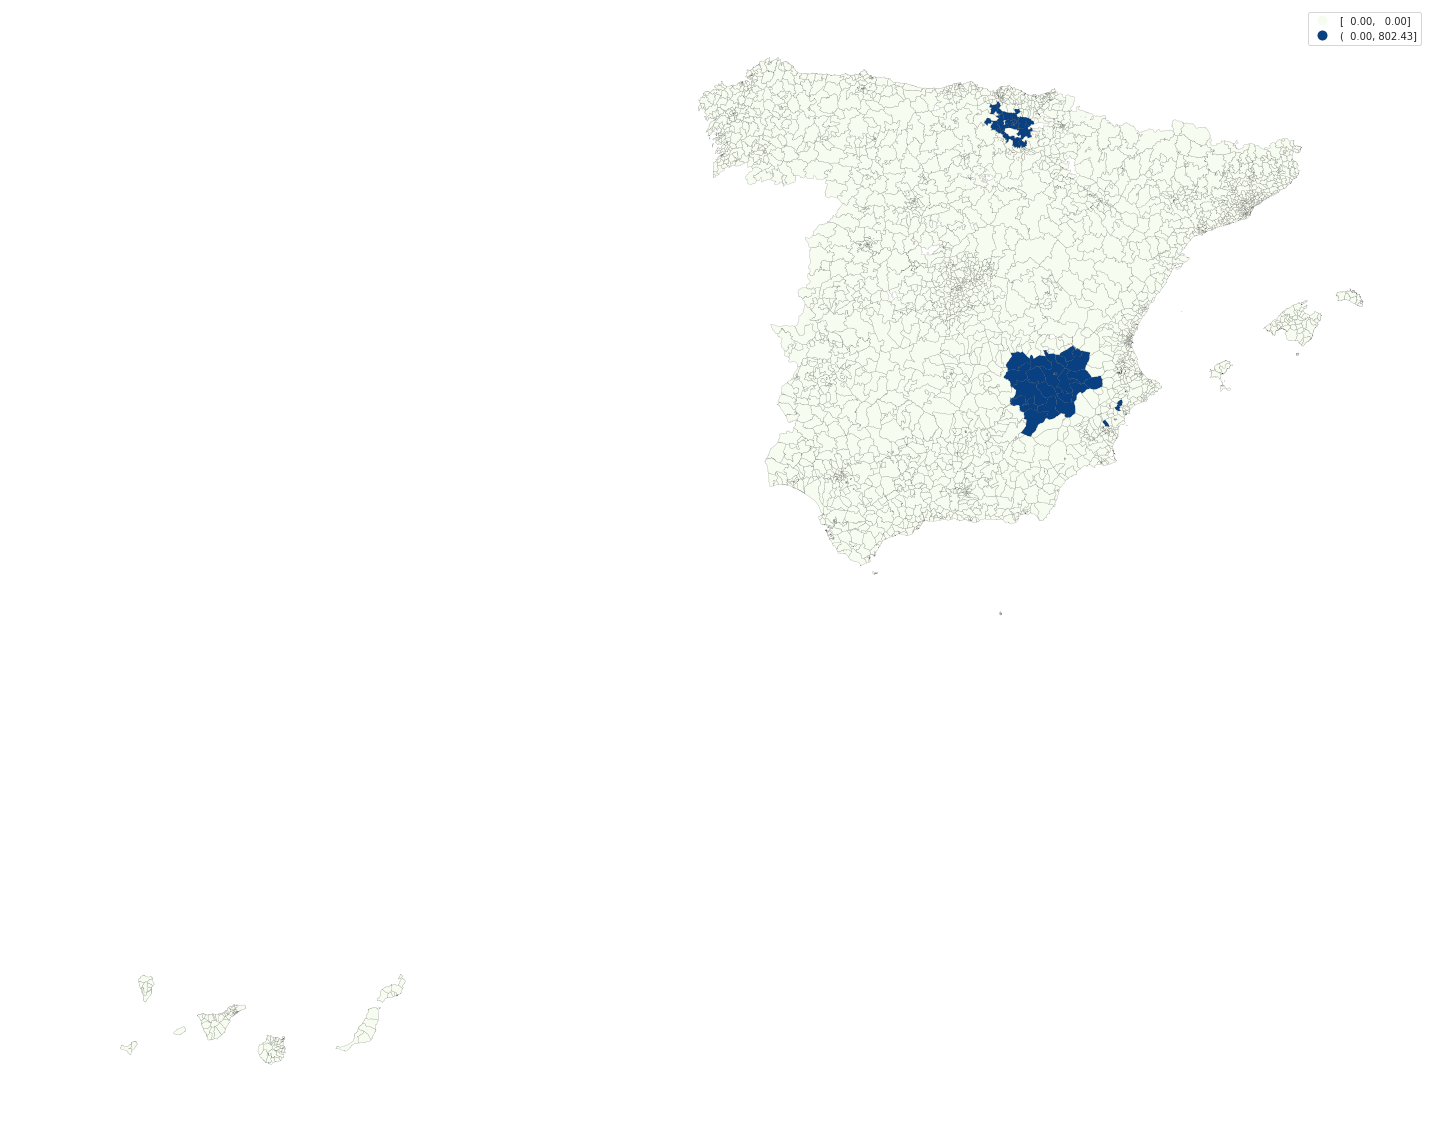

In [241]:
generate_map_plot_fn(results_gdf, 'arima-MAE')

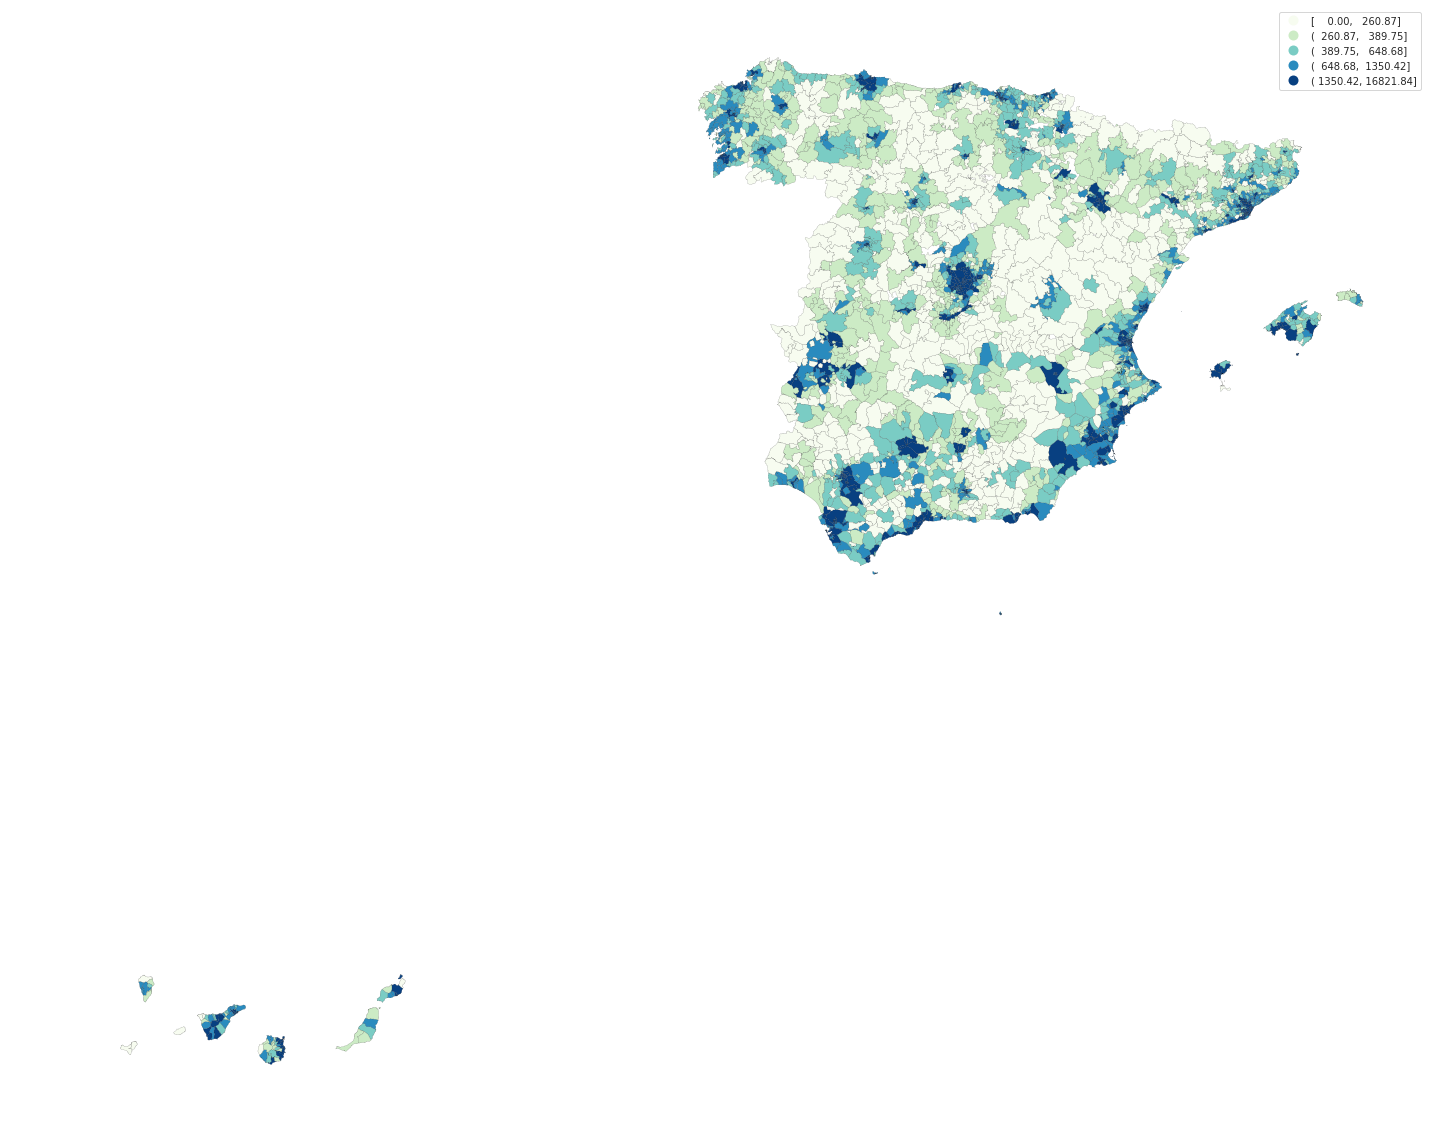

In [242]:
generate_map_plot_fn(results_gdf, 'naive-MAE')

### Madrid results

In [243]:
mad_zones_id = mad_zones.index.tolist()

In [244]:
len(mad_zones_id)

361

In [245]:
madrid_results = results_gdf[results_gdf.index.isin(mad_zones_id)]

In [246]:
madrid_results.shape

(43, 27)

In [247]:
madrid_results.head()

Unnamed: 0  gnn-MAE     gnn-MSE  gnn-RMSE  naive-MAE    naive-MSE  \
area_id                                                                      
2800601        1498 1572.084 4829682.384  2197.654   6419.456 54266596.873   
2800701        1499 1168.845 2721800.447  1649.788   4988.223 30223975.701   
2800702        1500  597.833  675464.421   821.866   2691.814  9202170.653   
28045          1526  399.720  313041.795   559.501   1696.756  3549911.709   
2804901        1529  349.548  256205.987   506.168   1293.030  2052018.594   

         naive-RMSE  gnn-cont-MAE  gnn-cont-MSE  gnn-cont-RMSE  ...  \
area_id                                                         ...   
2800601    7366.587      1337.212   3524250.863       1877.299  ...   
2800701    5497.634      1027.251   2266379.778       1505.450  ...   
2800702    3033.508       493.238    492461.325        701.756  ...   
28045      1884.121       340.234    234246.915        483.991  ...   
2804901    1432.487       293.057    186868.401        432.283  ...   

         gnn-ylag-MSE  gnn-ylag-RMSE  lstm-MAE    lstm-MSE  lstm-RMSE  \
area_id                                                                 
2800601   3560849.503       1887.021  1595.939 4237387.554   2058.492   
2800701   2189754.857       1479.782   993.066 1663568.580   1289.794   
2800702    486681.294        697.625   574.165  647413.422    804.620   
28045      242452.969        492.395     0.000       0.000      0.000   
2804901    206924.187        454.889     0.000       0.000      0.000   

         arima-MAE  arima-MSE  arima-RMSE  total_trips  \
area_id                                                  
2800601      0.000      0.000       0.000 39407374.528   
2800701      0.000      0.000       0.000 27223901.753   
2800702      0.000      0.000       0.000 19846572.482   
28045        0.000      0.000       0.000 11840681.064   
2804901      0.000      0.000       0.000 10551826.671   

                                                  geometry  
area_id                                                     
2800601  POLYGON ((446242.970 4484314.788, 445604.628 4...  
2800701  POLYGON ((427886.939 4465414.893, 427502.435 4...  
2800702  POLYGON ((431652.799 4466638.560, 431623.333 4...  
28045    POLYGON ((429684.220 4503234.770, 429862.537 4...  
2804901  POLYGON ((451599.289 4474155.805, 451325.974 4...  

[5 rows x 27 columns]

In [248]:
madrid_results.mean()

Unnamed: 0          1572.977
gnn-MAE             1341.170
gnn-MSE          5258547.185
gnn-RMSE            1907.778
naive-MAE           5632.147
naive-MSE       57104447.022
naive-RMSE          6420.480
gnn-cont-MAE        1114.827
gnn-cont-MSE     3828502.266
gnn-cont-RMSE       1627.828
gnn-gm-MAE          1022.524
gnn-gm-MSE       3251732.986
gnn-gm-RMSE         1515.561
gnn-q-gm-MAE         901.051
gnn-q-gm-MSE     2548947.152
gnn-q-gm-RMSE       1318.791
gnn-ylag-MAE        1099.774
gnn-ylag-MSE     3885114.169
gnn-ylag-RMSE       1649.351
lstm-MAE              73.562
lstm-MSE          152287.664
lstm-RMSE             96.579
arima-MAE              0.000
arima-MSE              0.000
arima-RMSE             0.000
total_trips     38200640.895
dtype: float64

In [249]:
madrid_results.std()

Unnamed: 0            34.056
gnn-MAE              887.149
gnn-MSE          6228877.586
gnn-RMSE            1287.431
naive-MAE           3502.345
naive-MSE       61189229.042
naive-RMSE          4032.373
gnn-cont-MAE         732.414
gnn-cont-MSE     4647210.753
gnn-cont-RMSE       1098.519
gnn-gm-MAE           653.889
gnn-gm-MSE       3769922.356
gnn-gm-RMSE          988.708
gnn-q-gm-MAE         594.645
gnn-q-gm-MSE     3292943.414
gnn-q-gm-RMSE        910.503
gnn-ylag-MAE         701.970
gnn-ylag-MSE     4657534.420
gnn-ylag-RMSE       1092.011
lstm-MAE             293.995
lstm-MSE          692559.469
lstm-RMSE            382.575
arima-MAE              0.000
arima-MSE              0.000
arima-RMSE             0.000
total_trips     21552707.439
dtype: float64

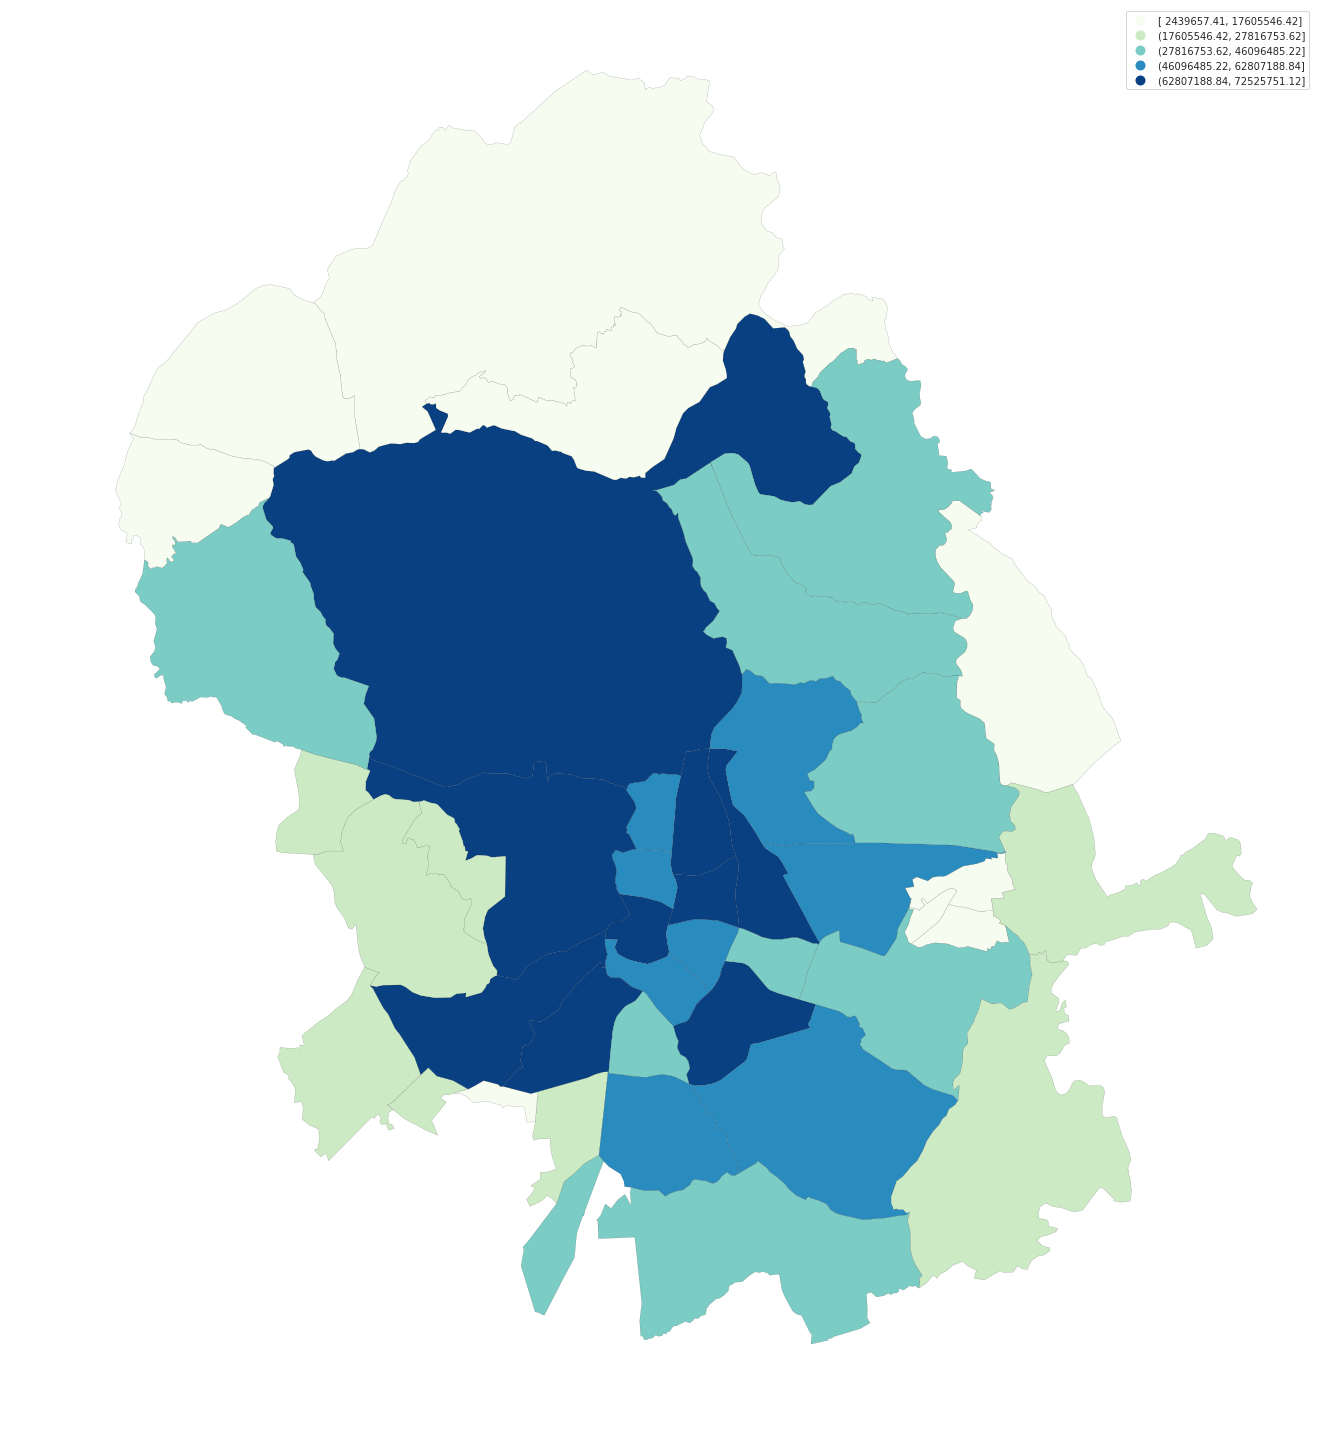

In [250]:
generate_map_plot_fn(madrid_results, 'total_trips')

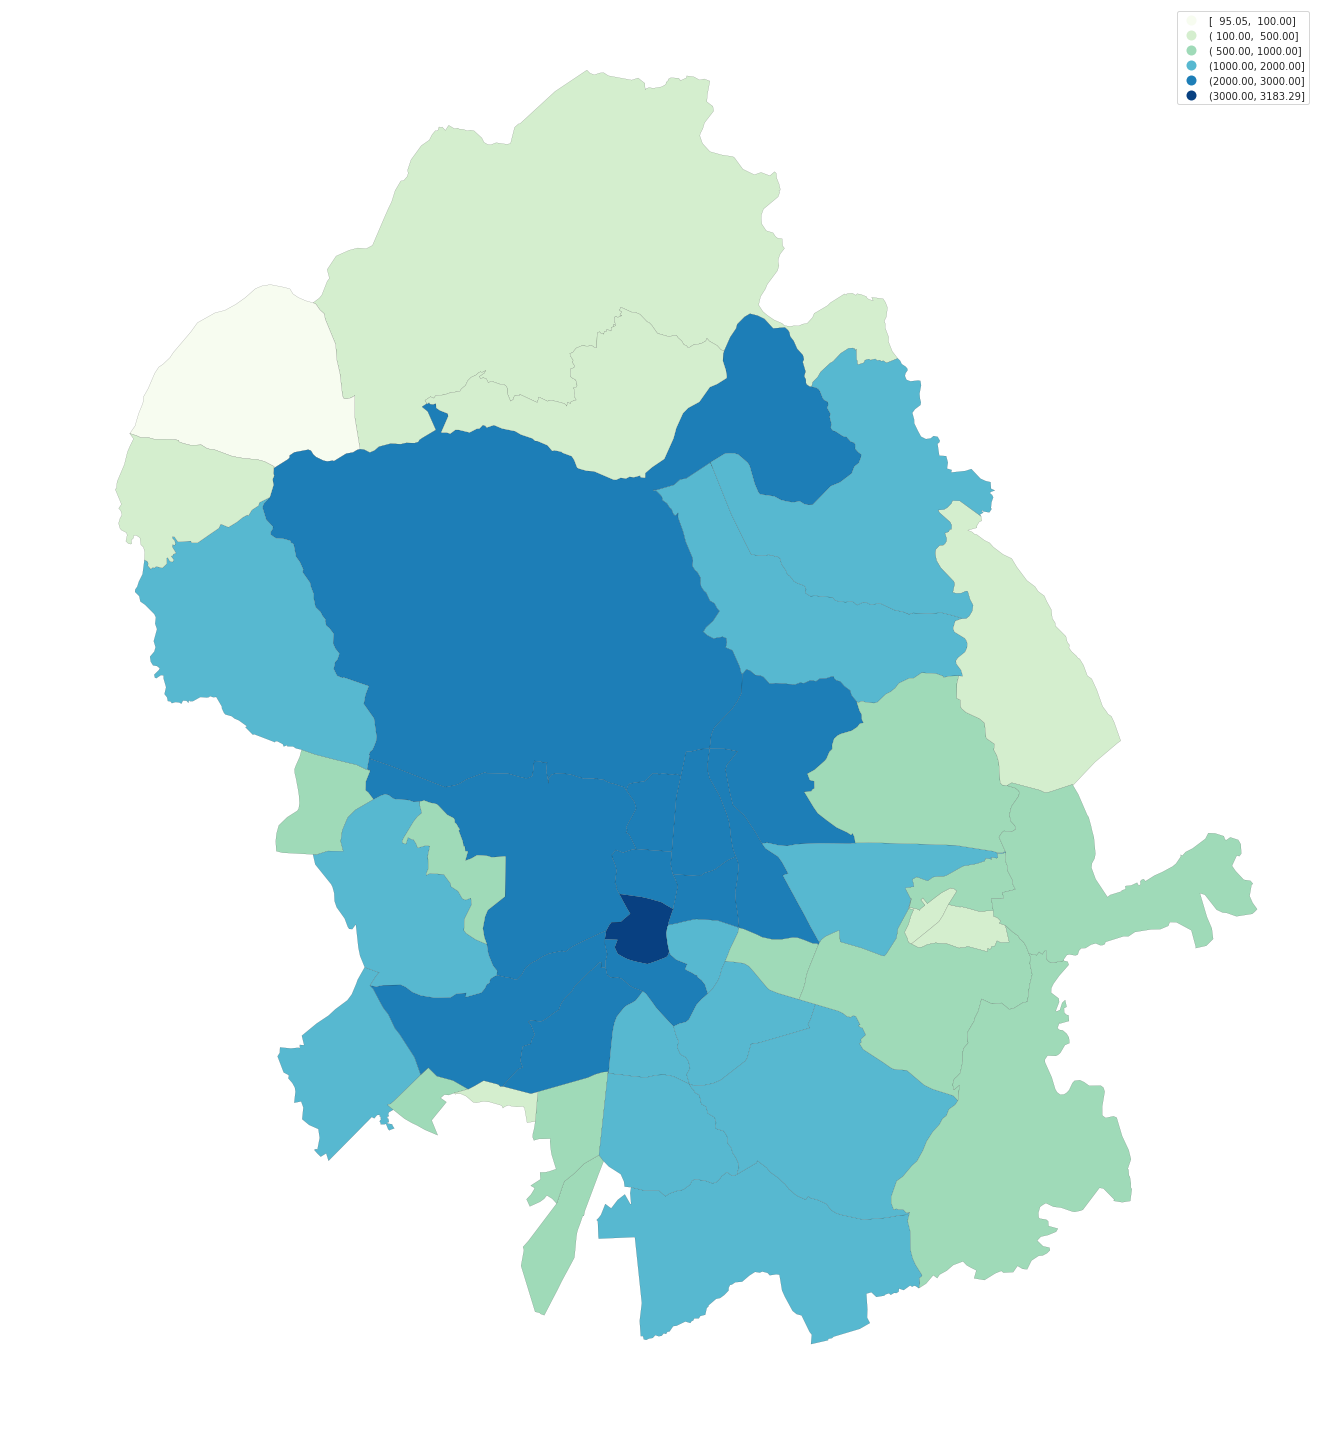

In [251]:
generate_map_plot_fn(madrid_results, 'gnn-MAE', scheme='user_defined')

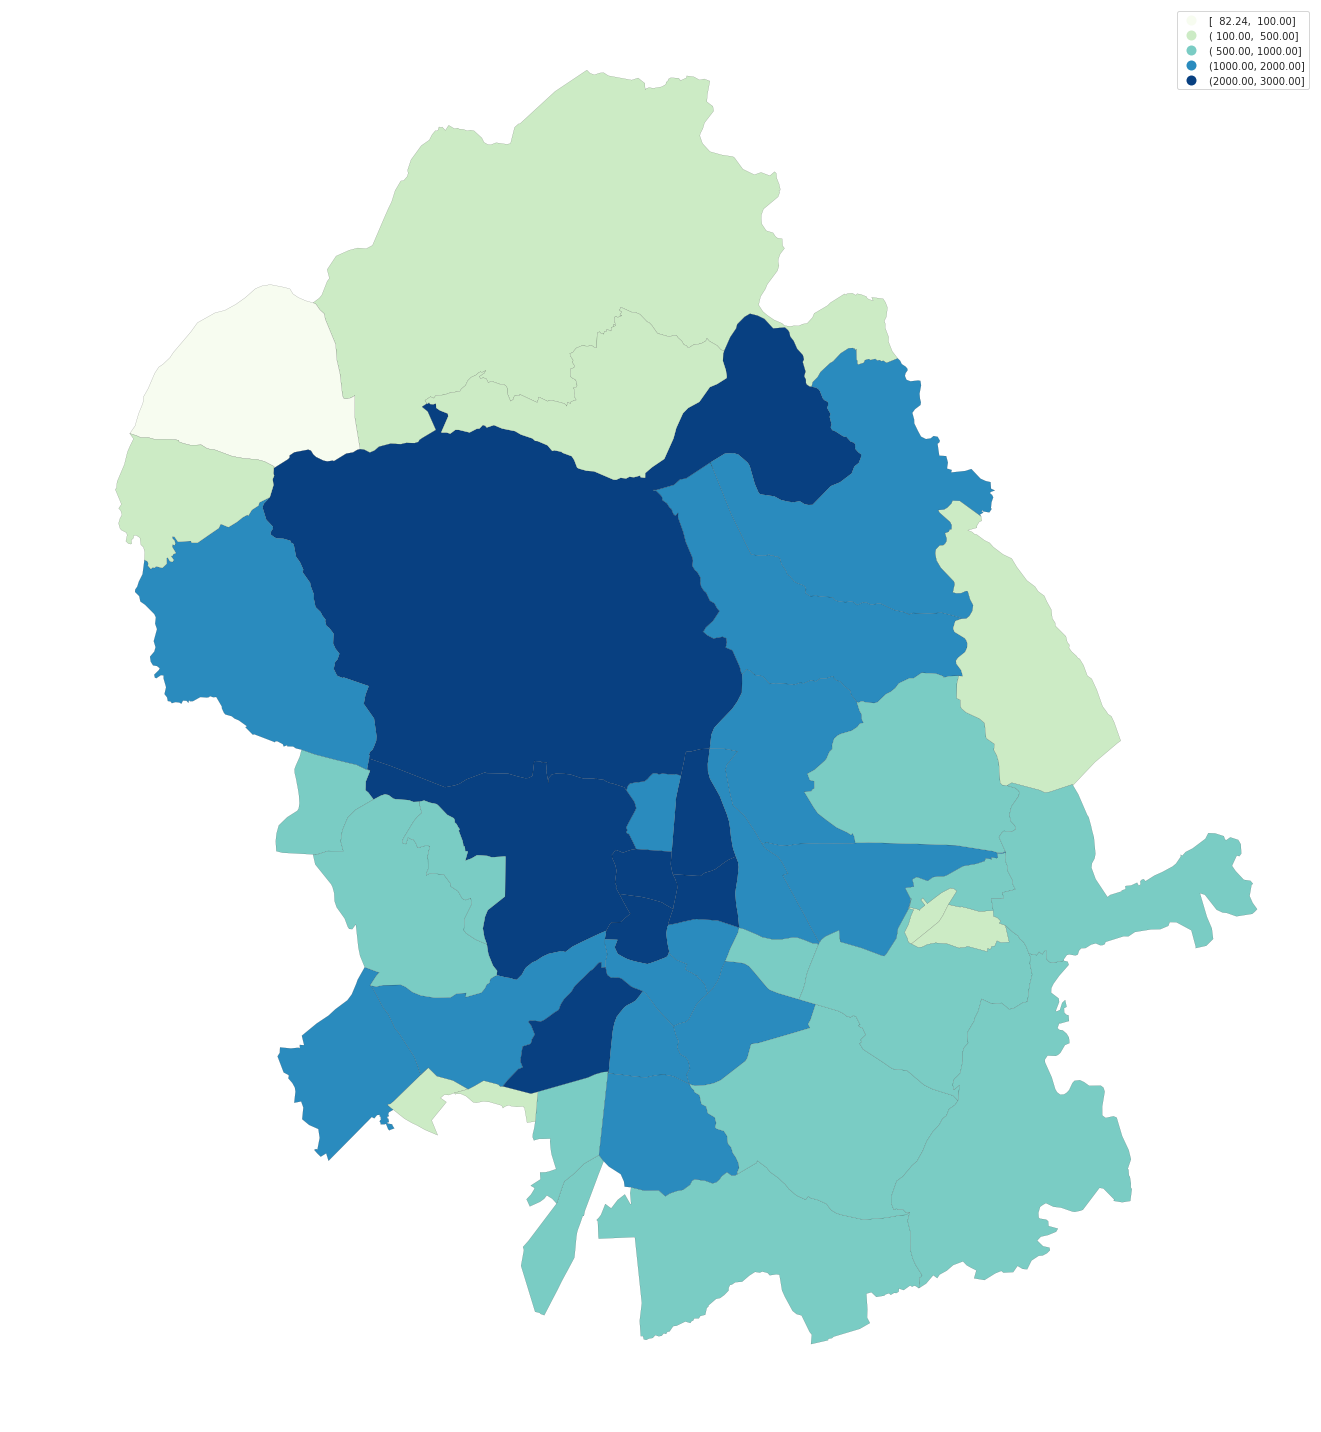

In [252]:
generate_map_plot_fn(madrid_results, 'gnn-cont-MAE', scheme='user_defined')

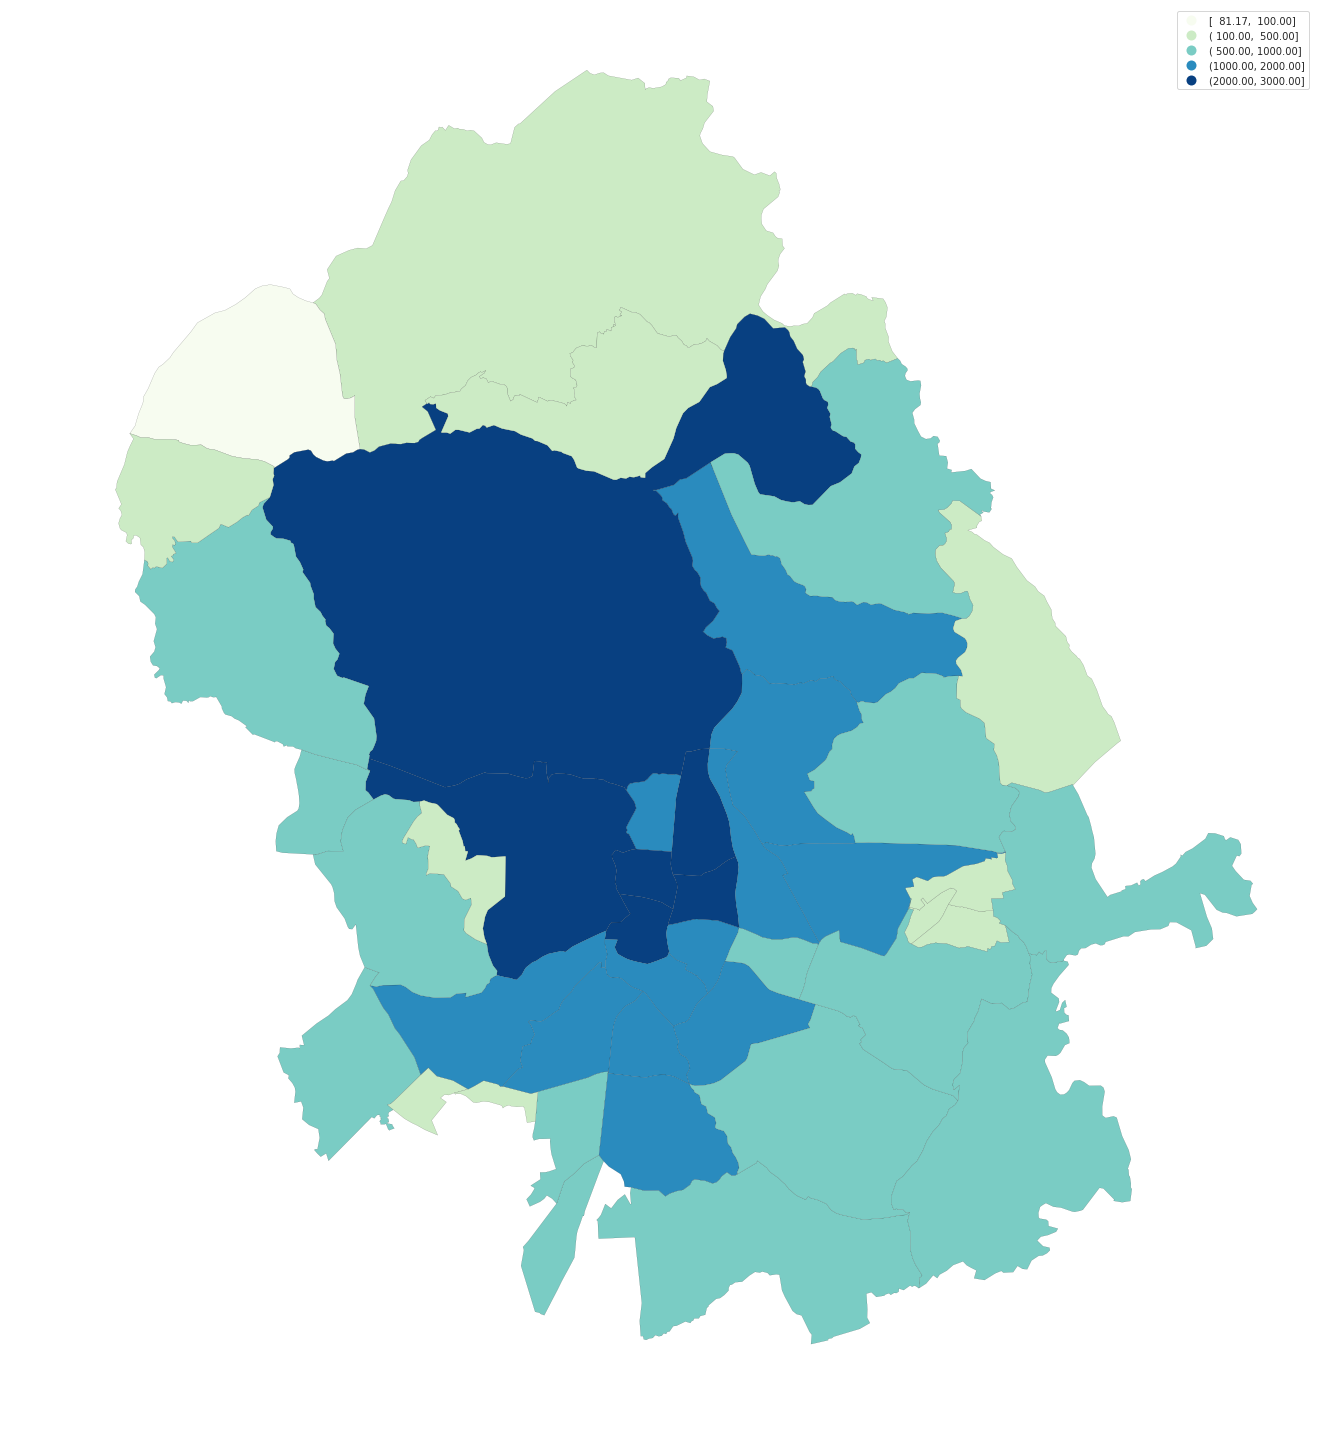

In [253]:
generate_map_plot_fn(madrid_results, 'gnn-gm-MAE', scheme='user_defined')

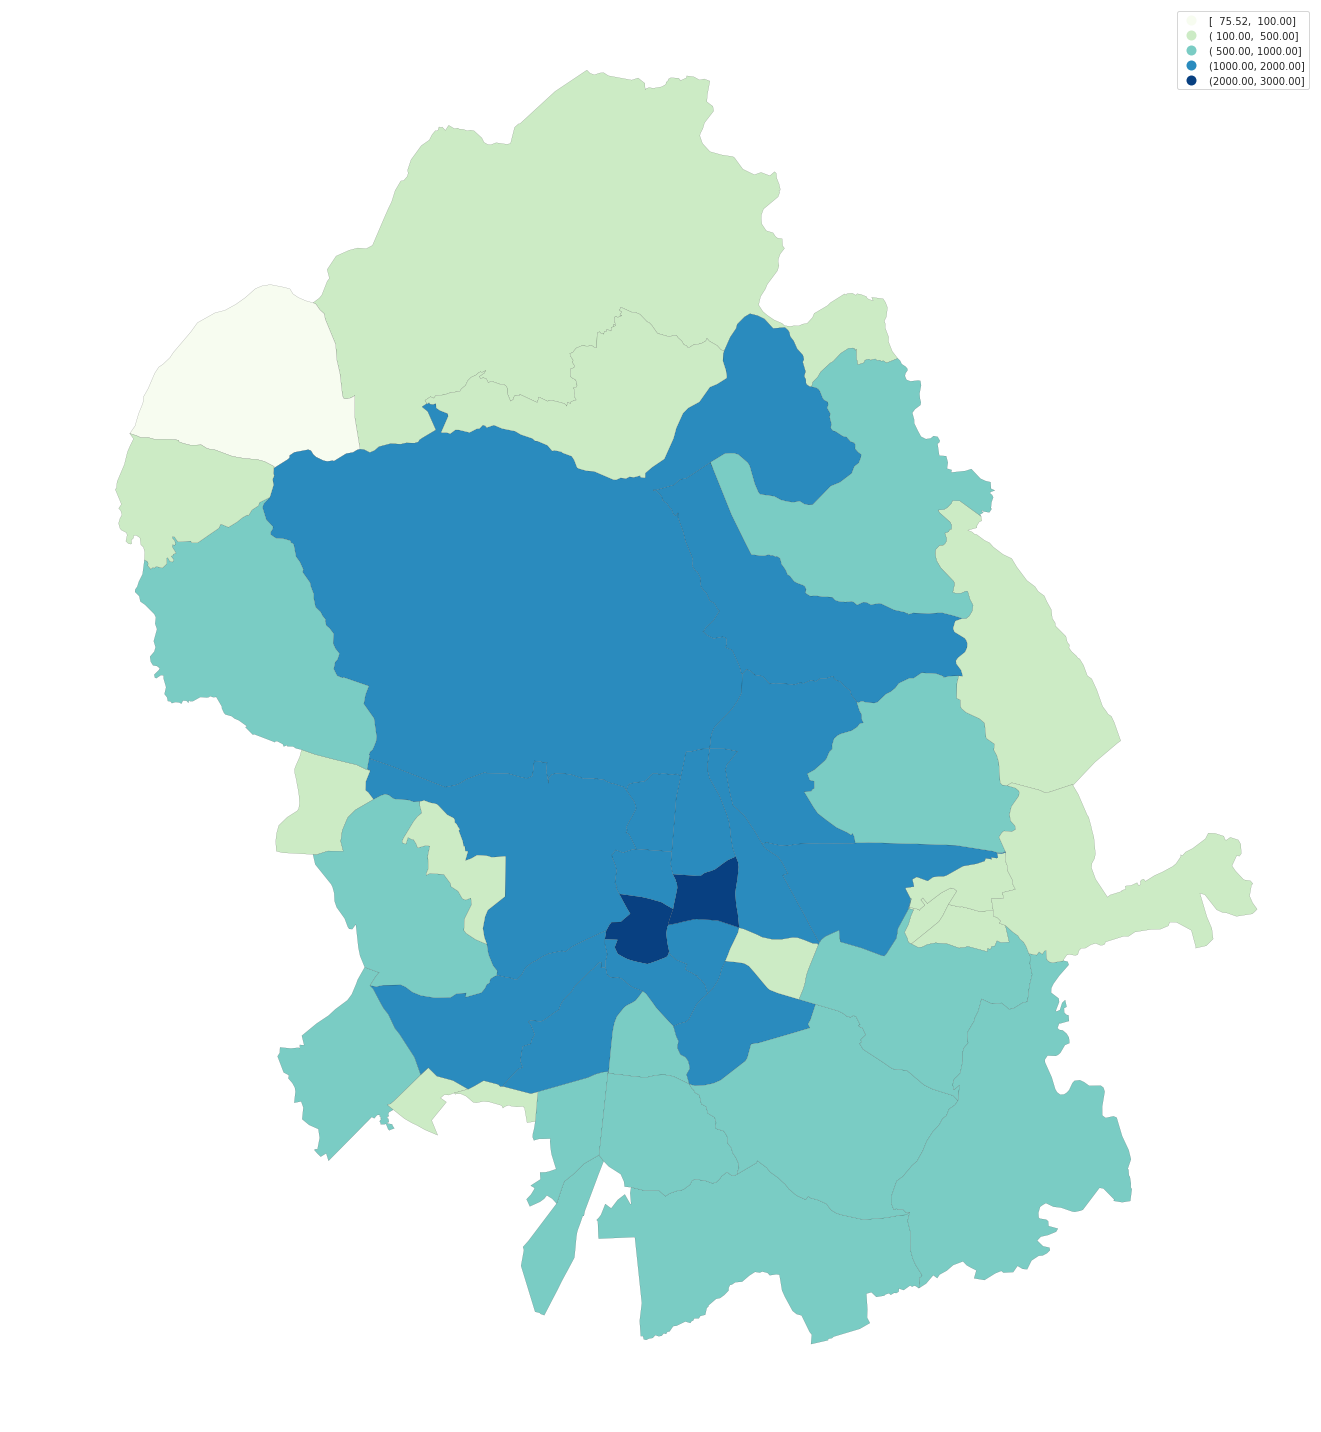

In [254]:
generate_map_plot_fn(madrid_results, 'gnn-q-gm-MAE', scheme='user_defined')

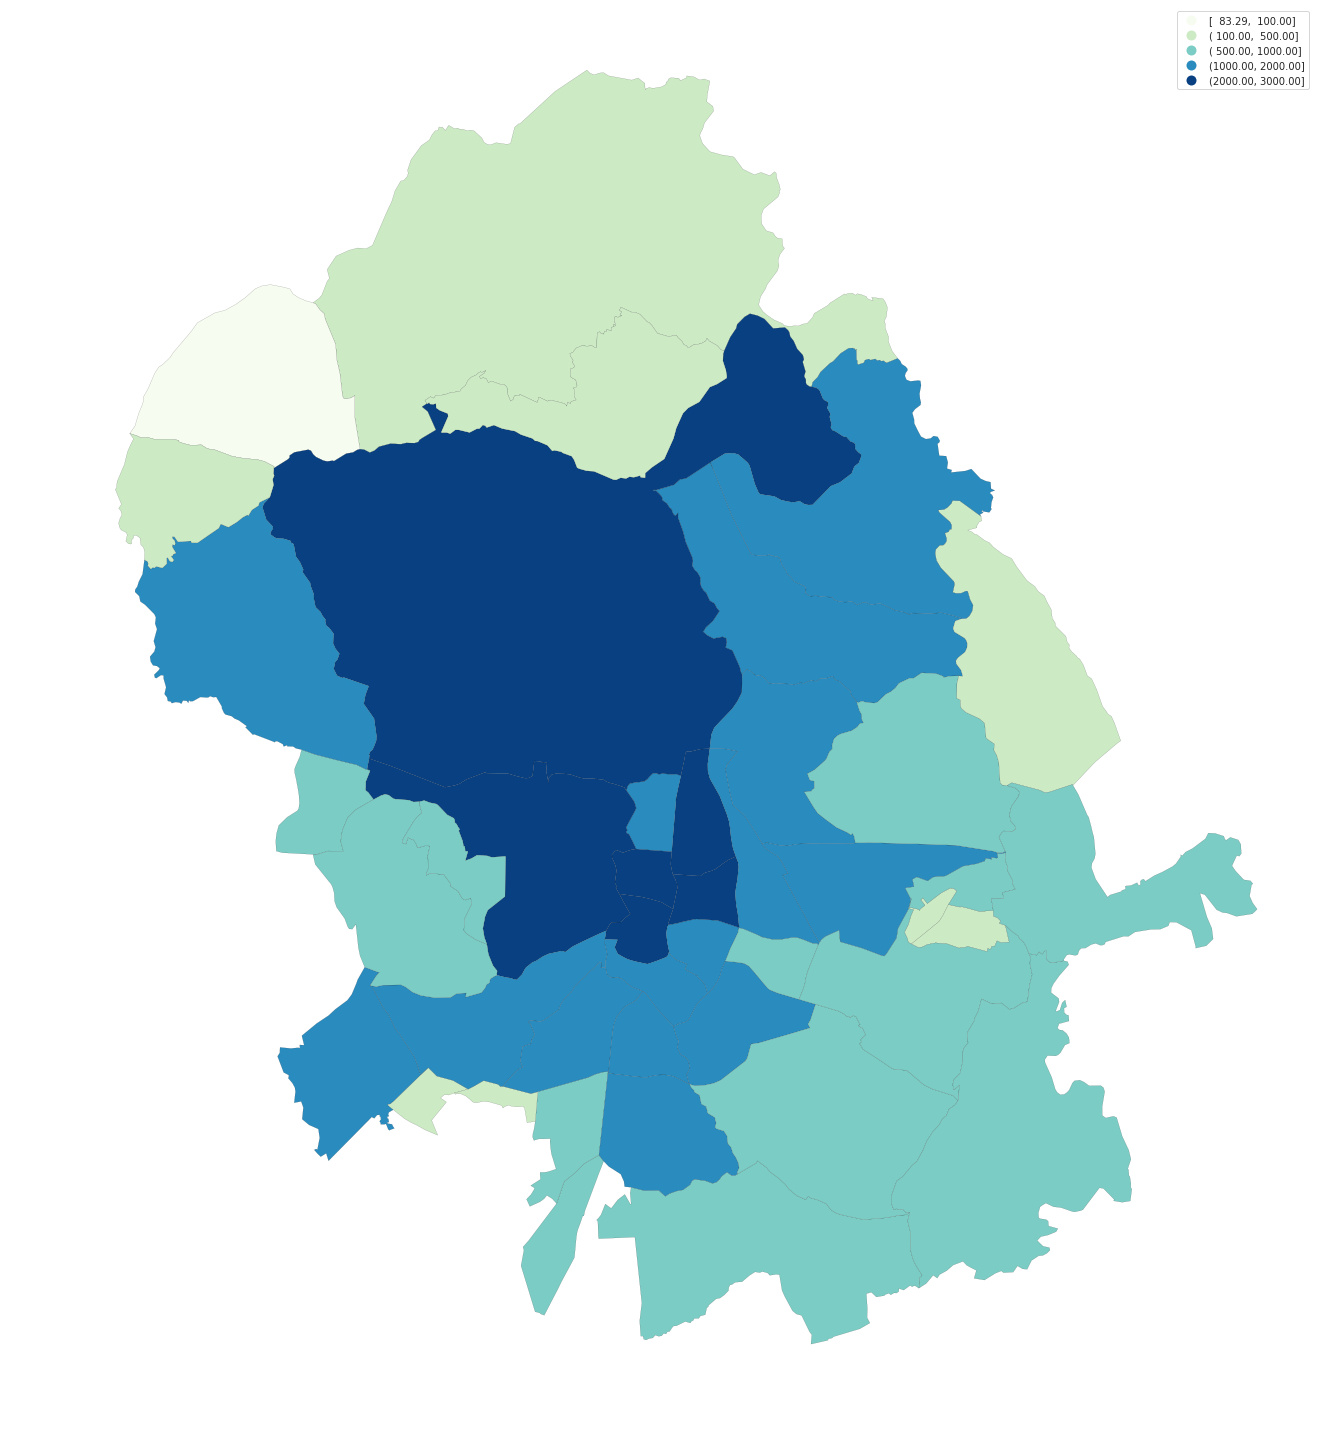

In [255]:
generate_map_plot_fn(madrid_results, 'gnn-ylag-MAE', scheme='user_defined')

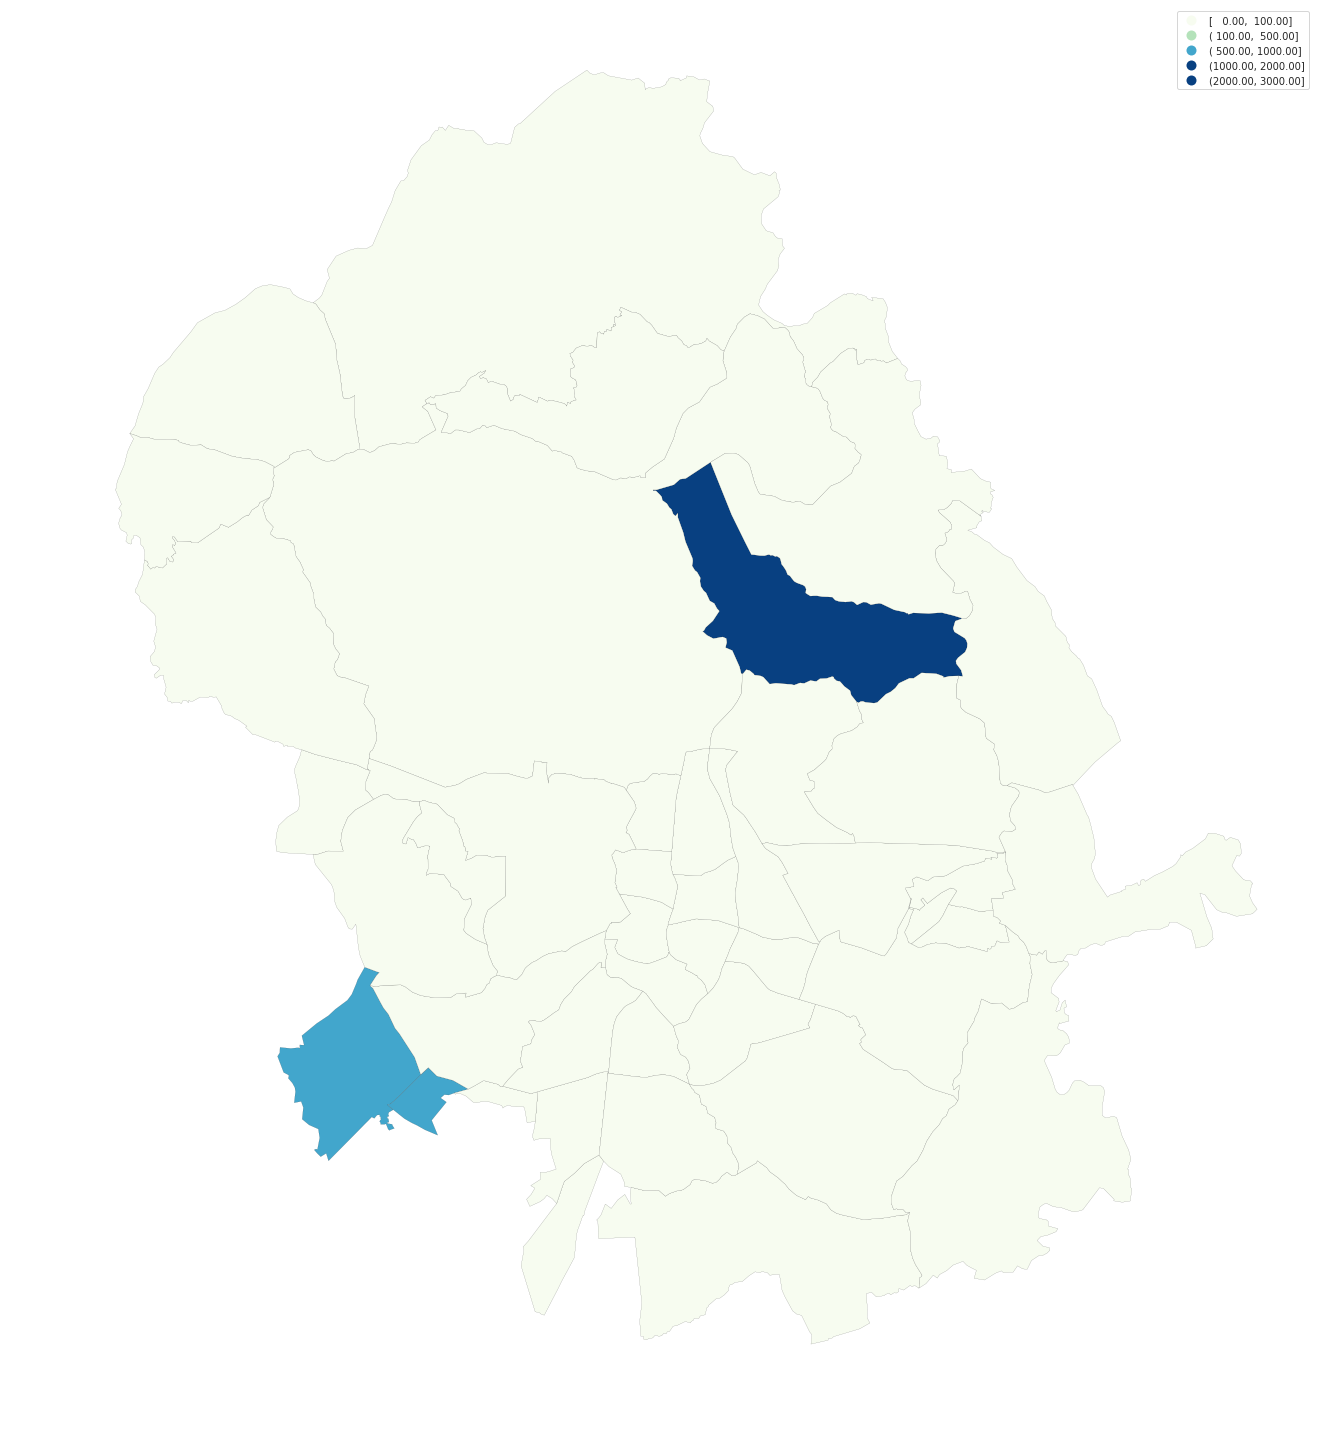

In [256]:
generate_map_plot_fn(madrid_results, 'lstm-MAE', scheme='user_defined')

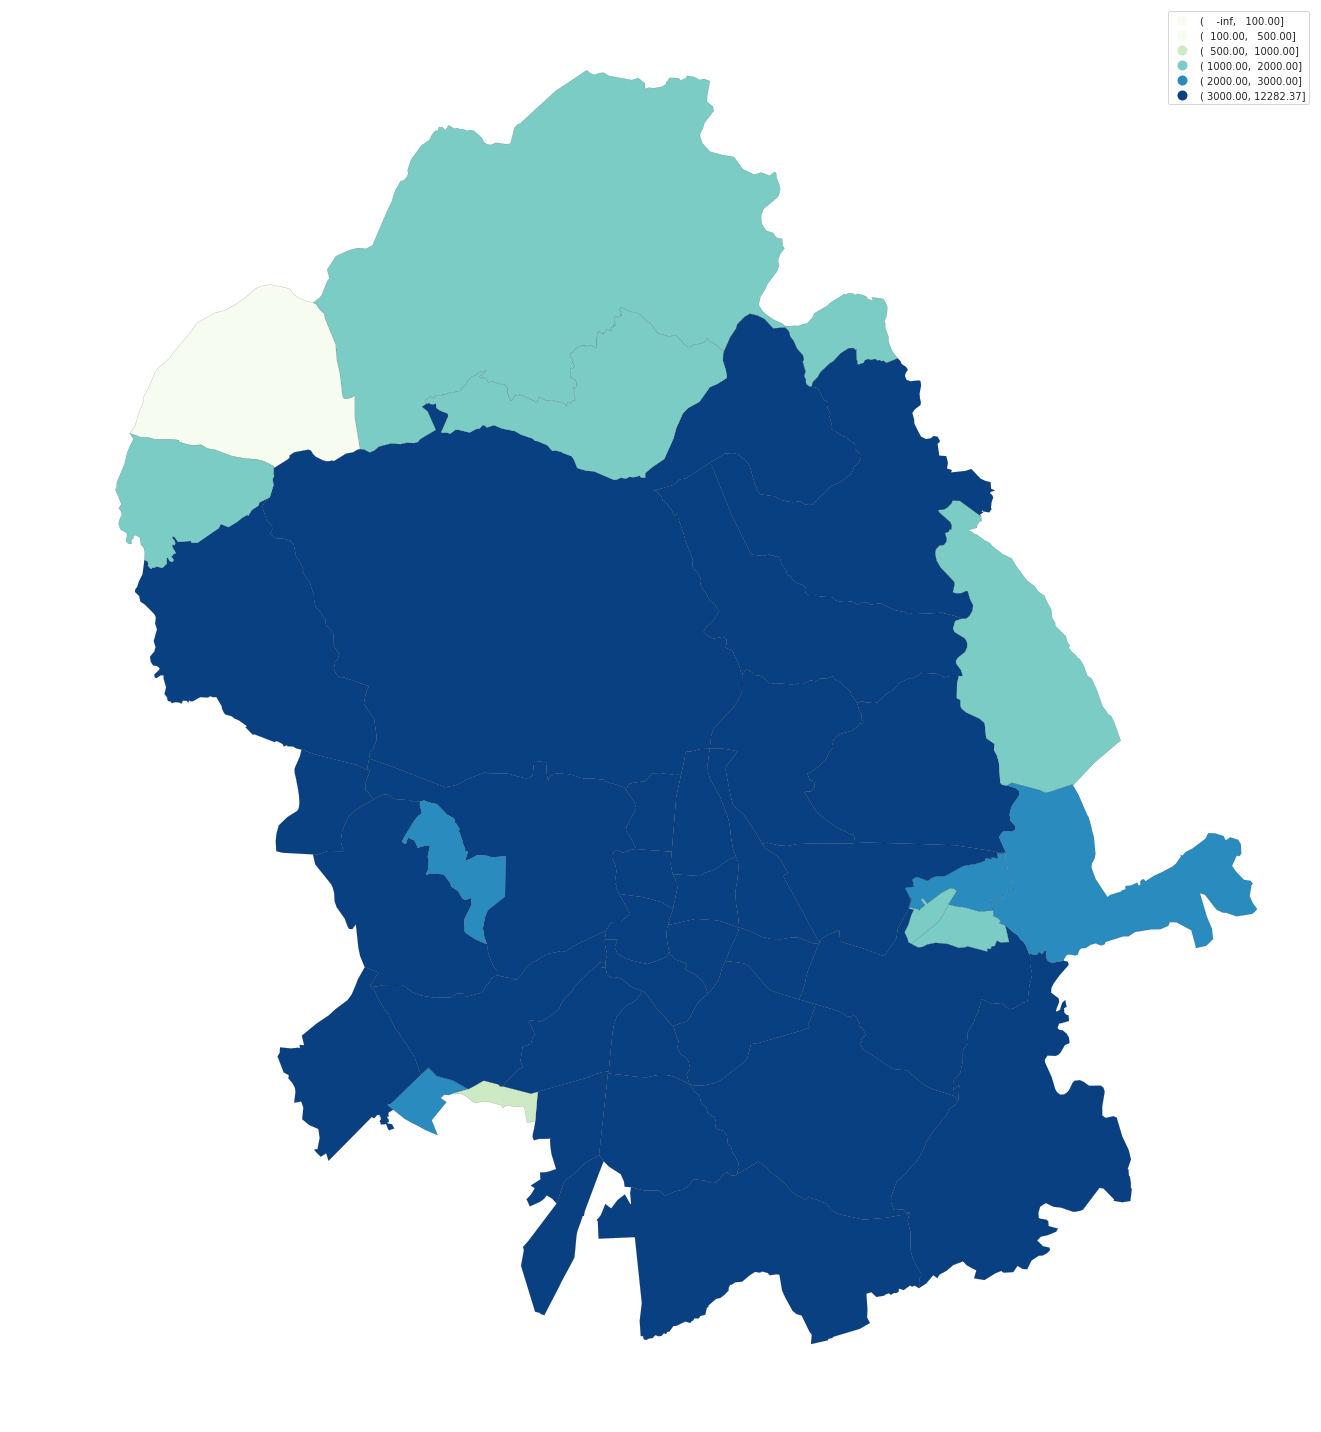

In [257]:
generate_map_plot_fn(madrid_results, 'naive-MAE', scheme='user_defined')

/home/fterroso/python/lib/python3.6/site-packages/mapclassify/classifiers.py:890: RuntimeWarning: invalid value encountered in double_scalars
  gadf = 1 - self.adcm / adam


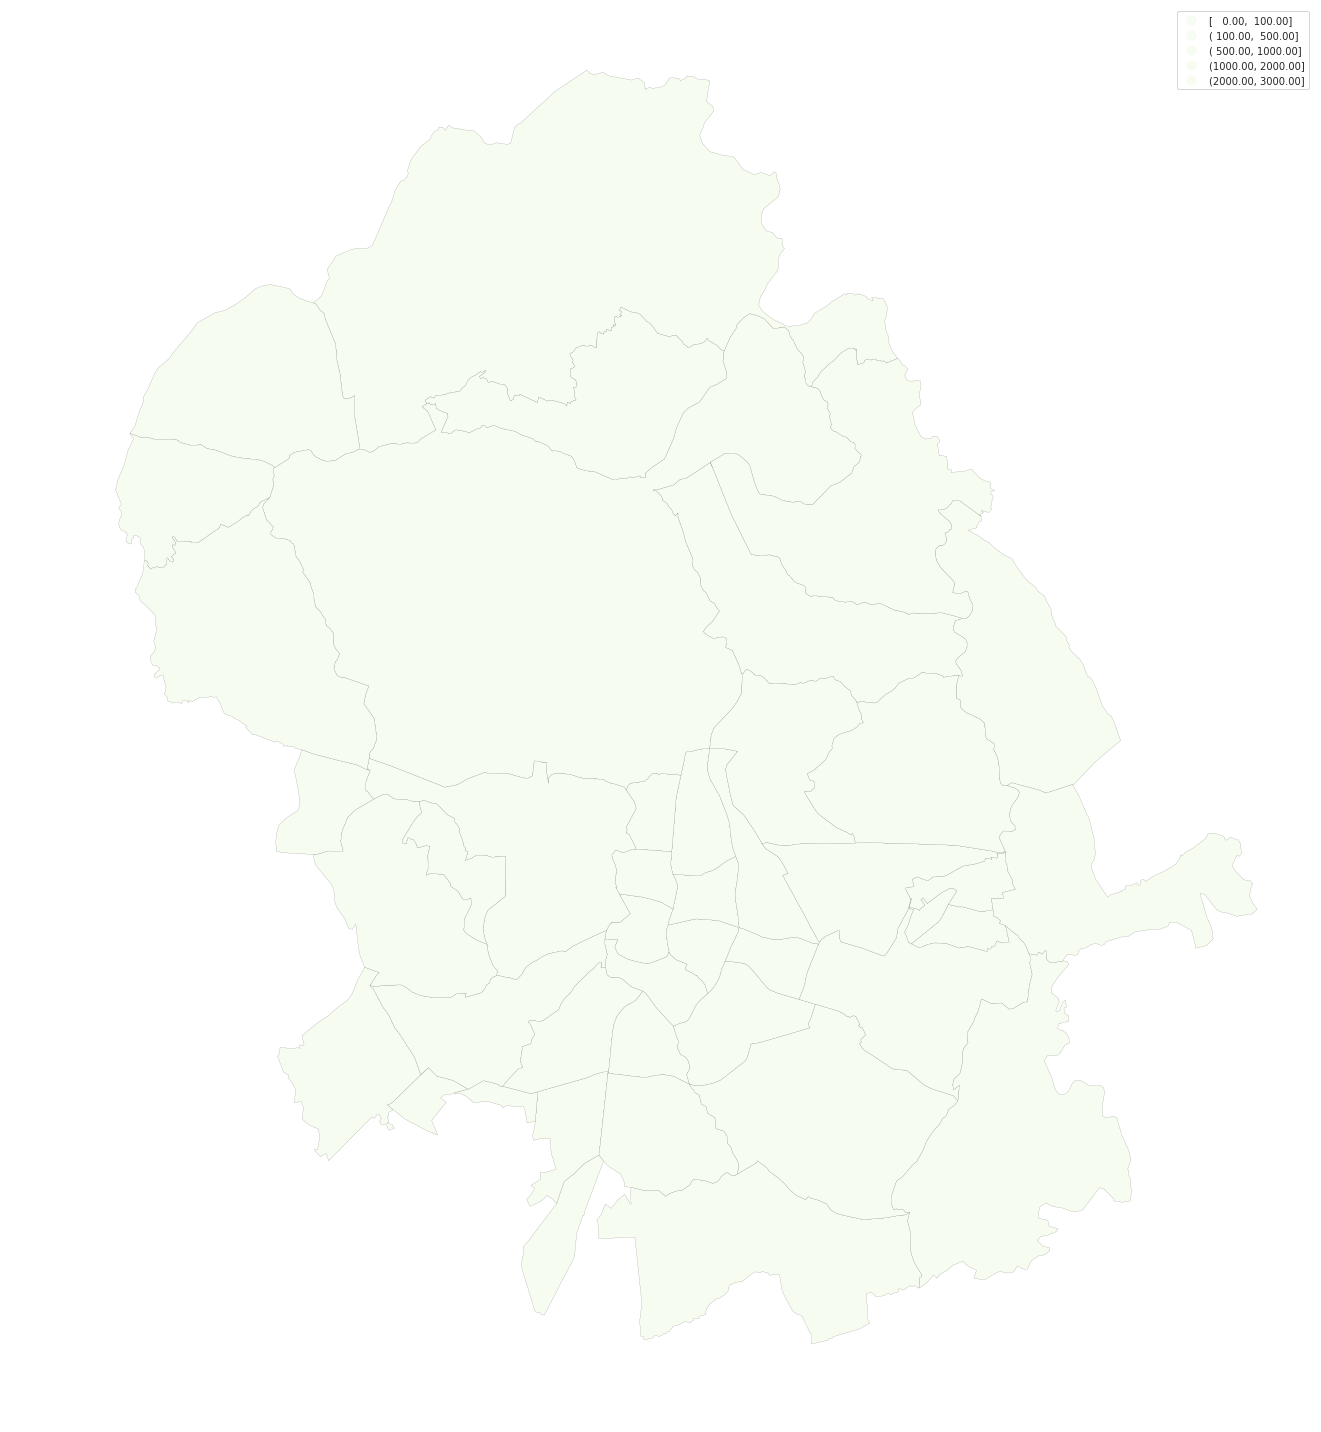

In [258]:
generate_map_plot_fn(madrid_results, 'arima-MAE', scheme='user_defined')

## Number of trips vs metrics

In [259]:
max_trips= results_gdf['total_trips'].max()+ 10000

In [260]:
min_trips= results_gdf['total_trips'].min()

In [261]:
min_error = results_gdf['gnn-MAE'].min()
max_error= results_gdf['gnn-MAE'].max() 

In [262]:
results_gdf.columns

Index(['Unnamed: 0', 'gnn-MAE', 'gnn-MSE', 'gnn-RMSE', 'naive-MAE',
       'naive-MSE', 'naive-RMSE', 'gnn-cont-MAE', 'gnn-cont-MSE',
       'gnn-cont-RMSE', 'gnn-gm-MAE', 'gnn-gm-MSE', 'gnn-gm-RMSE',
       'gnn-q-gm-MAE', 'gnn-q-gm-MSE', 'gnn-q-gm-RMSE', 'gnn-ylag-MAE',
       'gnn-ylag-MSE', 'gnn-ylag-RMSE', 'lstm-MAE', 'lstm-MSE', 'lstm-RMSE',
       'arima-MAE', 'arima-MSE', 'arima-RMSE', 'total_trips', 'geometry'],
      dtype='object')

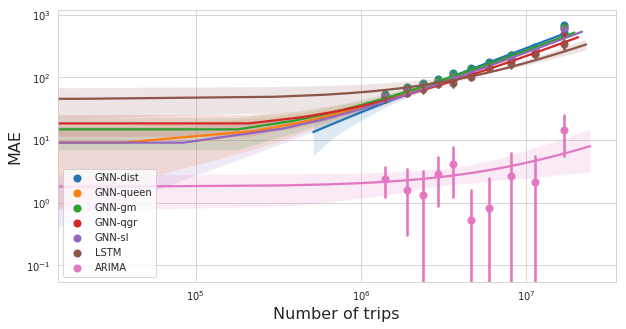

In [263]:
f, ax = plt.subplots(figsize=(10,5))
#ax.set(xlim=(min_trips, max_trips), ylim=(min_error, max_error))
ax= sns.regplot(ax=ax, x='total_trips', y='gnn-MAE', data=results_gdf, scatter=True, x_bins=10, label='GNN-dist');
sns.regplot(ax=ax, x='total_trips', y='gnn-cont-MAE', data=results_gdf, scatter=True, x_bins=10, label='GNN-queen');
sns.regplot(ax=ax, x='total_trips', y='gnn-gm-MAE', data=results_gdf, scatter=True, x_bins=10, label='GNN-gm');
sns.regplot(ax=ax, x='total_trips', y='gnn-q-gm-MAE', data=results_gdf, scatter=True, x_bins=10, label='GNN-qgr');
sns.regplot(ax=ax, x='total_trips', y='gnn-ylag-MAE', data=results_gdf, scatter=True, x_bins=10, label='GNN-sl');

sns.regplot(ax=ax, x='total_trips', y='lstm-MAE', data=results_gdf, scatter=True, x_bins=10, label='LSTM');
sns.regplot(ax=ax, x='total_trips', y='arima-MAE', data=results_gdf, x_bins=10, label='ARIMA')
ax.set_ylabel('MAE')
ax.set_xlabel('Number of trips')
ax.xaxis.label.set_size(16)
ax.yaxis.label.set_size(16)
ax.set(xscale="log", yscale="log");
ax.legend(loc='lower left');
plt.savefig(os.path.join('figs',f'MAE_evolution_{T}.png'))

In [264]:
print("That's all folks")

That's all folks
